In [29]:
import pandas as pd
df = pd.read_csv('../../data/processed/cleaned_soci_economic_profile.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe(include='all').T
df.head(5)


Shape: (90, 107)
Columns: ['Temporary Crop', 'Number of Holdings.1', 'Area (ha.)', 'Permanent crop type', 'Total holdings reporting', 'Compact plantation area (ha)', 'Compact plantation Number of scattered trees', 'Productive age', 'Non-productive age', 'Productive age.1', 'Non-productive age.1', 'No. of holdings', 'Area (ha)', 'Number of trees', 'Area_ha', 'prov', 'dist', 'Area_Name', 'Total_Households', 'total', 'Male', 'Female', 'absnt_cntry_hhld', 'absnt_cntry_tot', 'absnt_cntry_male', 'absnt_cntry_feml', 'absnt_abrd_hhld', 'absnt_abrd_tot', 'absnt_abrd_male', 'absnt_abrd_feml', 'Domain Value', 'Analytical Domain', 'Yes', 'No', "Don't Know", 'River', 'Length(km)', 'River Attribute', 'Value', 'District/Zone/Region', 'Total Population (2011)', 'Total Area (Km2)', 'Total Road Length (Km.)', 'Population Influenced per Km. Road (Nos.)', 'Road Density (Km/100', 'locations', 'Altitude in masl', 'Average Annual Rainfall(in mm)', 'S.N.', 'Glacier Lake', 'Location /District', 'Altitude (m.)'

Temporary Crop  Number of Holdings.1  Area (ha.) Permanent crop type  \
0          Early paddy              261873.0     71585.8              Orange   
1           Main paddy             2680955.0   1130360.5               Junar   
2         Upland paddy               86572.0     14441.4               Lemon   
3                Wheat             2049091.0    654194.3                Lime   
4  Spring/winter maize              578347.0    133695.6        Sweet Orange   

   Total holdings reporting  Compact plantation area (ha)  \
0                  363359.0                        6545.3   
1                   34806.0                         251.5   
2                  500552.0                        2806.9   
3                  115538.0                         152.3   
4                   55904.0                         186.0   

   Compact plantation Number of scattered trees  Productive age  \
0                                       85874.0          4055.2   
1                                        5730.0           153.1   
2                                       53129.0          1287.5   
3                                        9018.0           116.8   
4                                        8461.0           138.9   

   Non-productive age  Productive age.1  ...  Glacier Covered(in percentage)  \
0           2581644.0           54507.0  ...                               -   
1             83690.0            2644.0  ...                               -   
2            805718.0           35998.0  ...                            27.0   
3             49366.0            2867.0  ...                               -   
4            106123.0            2733.0  ...                               -   

                Source     Type of hydrological station  \
0                    -                    Semiautomatic   
1  Lower Barun Glacier                      Staff gauge   
2         Imja glacier                         Recorder   
3       khumbu Glacier                                -   
4         Imja glacier  RLS(Radar Level Sensor) in lake   

   Type of meterological station  Remarks              district  \
0                              -        -                 nepal   
1                      Raingauge        -    urban munipalities   
2                  Semiautomatic        -  rural municipalities   
3                      raingauge        -              mountain   
4                            AWS        -                  hill   

   district_matched district_matched_second_round  district_matched_count  \
0               NaN               kabhrepalanchok                      78   
1               NaN                           NaN                      78   
2               NaN                           NaN                      78   
3               NaN                           NaN                      78   
4               NaN                           NaN                      78   

   district_matched_second_round_count  
0                                   80  
1                                   80  
2                                   80  
3                                   80  
4                                   80  

[5 rows x 107 columns]

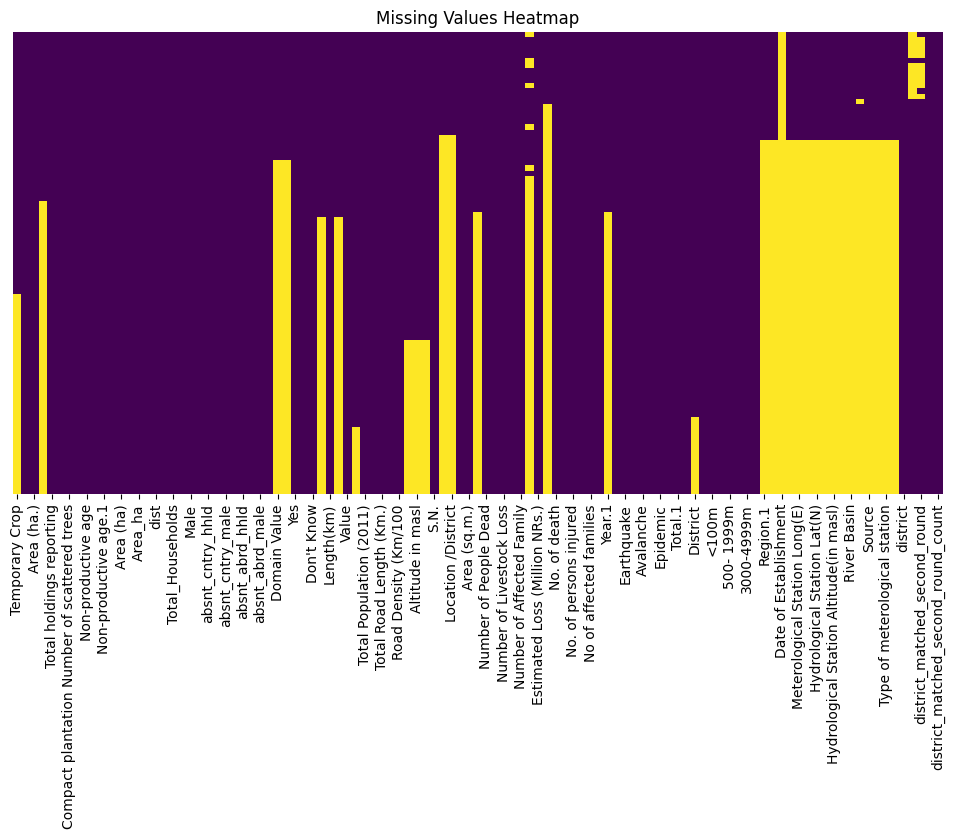

Missing Values (%):
 Date of Establishment                      100.000000
Disaster type                               84.444444
Glacier Lake                                77.777778
Glacier Covered(in percentage)              77.777778
Location /District                          77.777778
Meterological Station Altitude(in masl)     76.666667
Hydrological Station Lat(N)                 76.666667
Region.1                                    76.666667
Station                                     76.666667
Meterological Station Lat(N)                76.666667
Meterological Station Long(E)               76.666667
Hydrological Station Altitude(in masl)      76.666667
Hydrological Station Long.(E)               76.666667
Catchment(sq km)                            76.666667
River Basin                                 76.666667
Source                                      76.666667
Type of hydrological station                76.666667
Type of meterological station               76.666667
Remarks

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Percentage missing
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing Values (%):\n", missing_percent[missing_percent > 0])


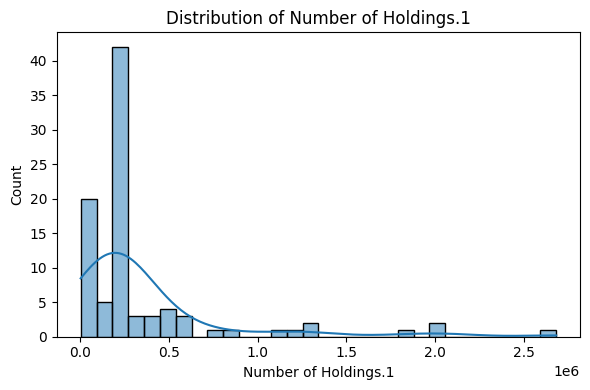

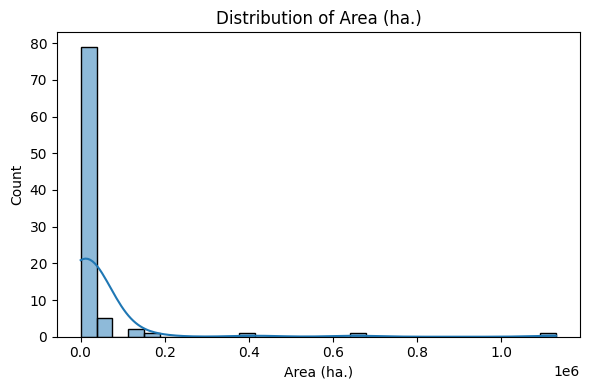

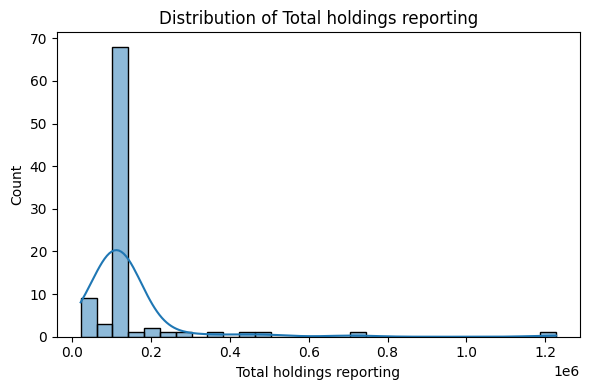

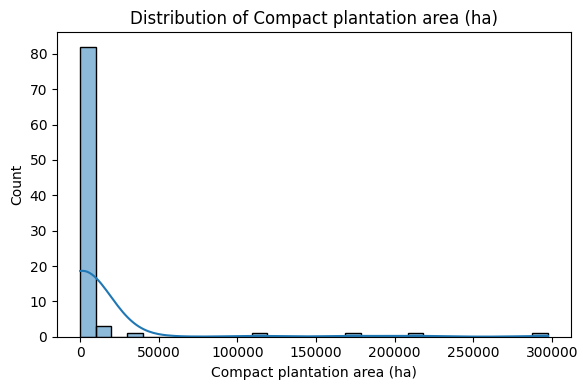

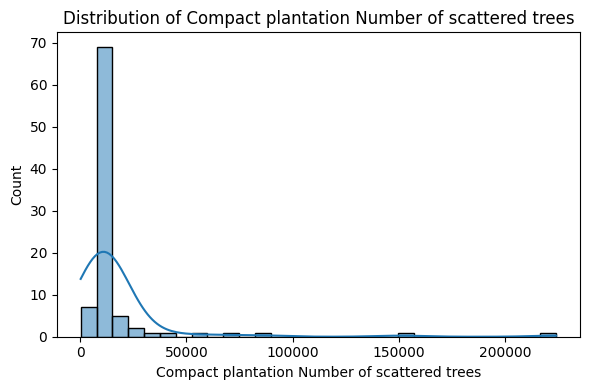

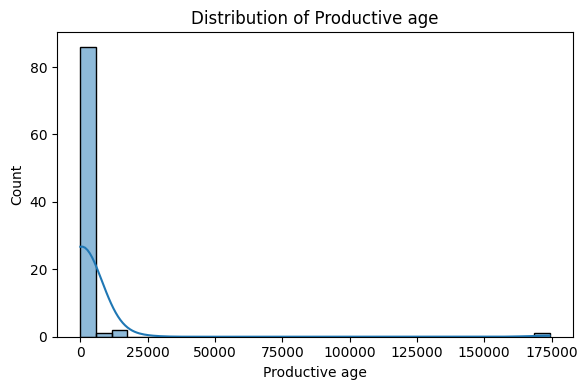

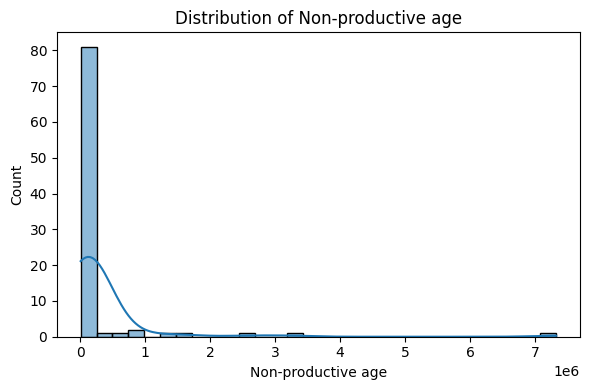

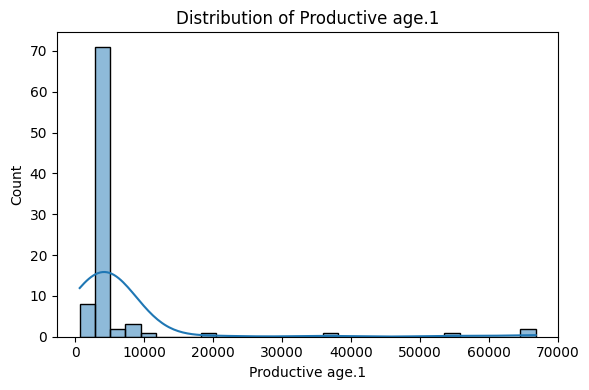

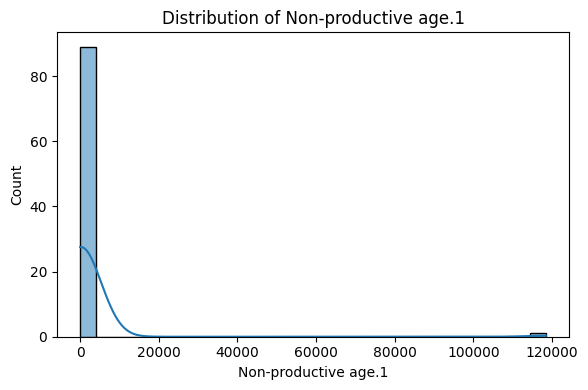

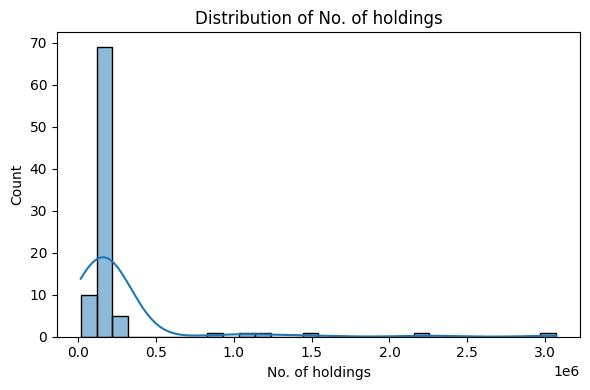

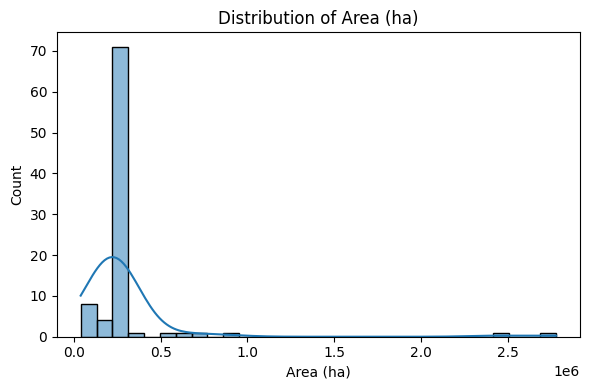

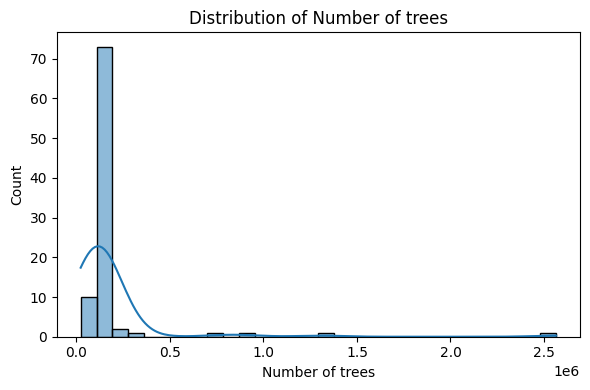

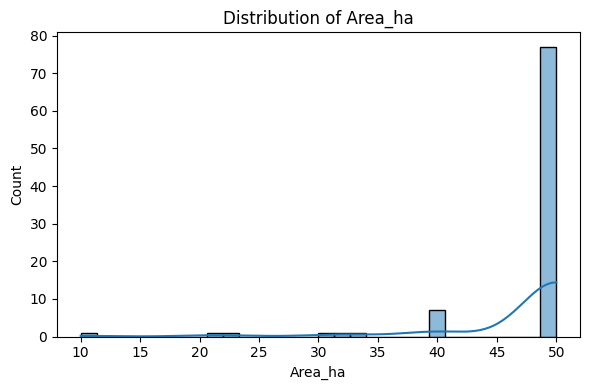

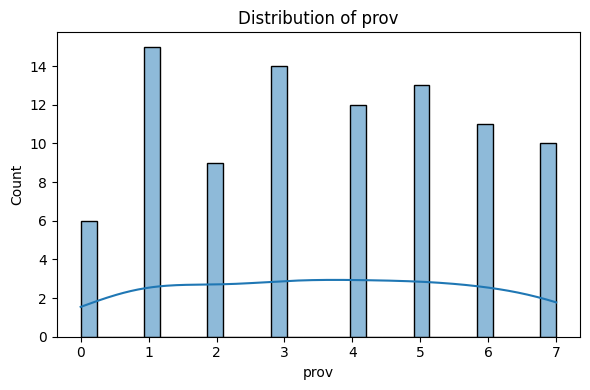

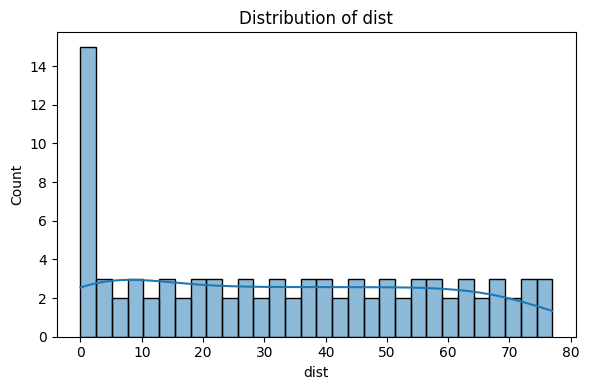

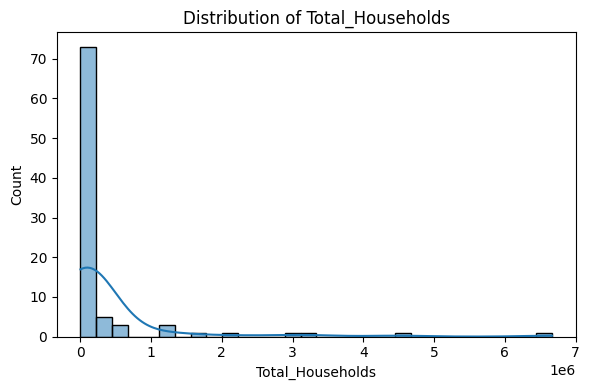

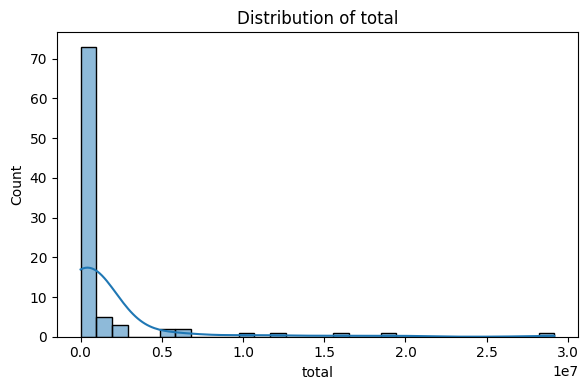

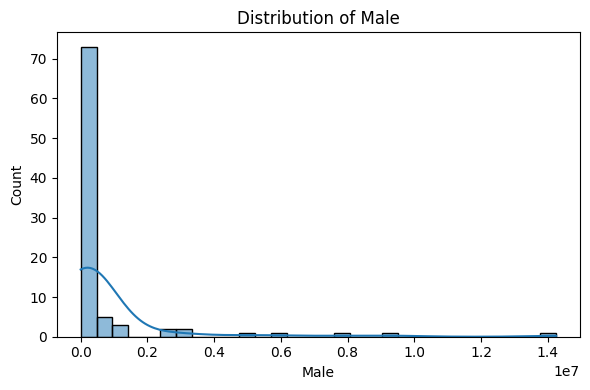

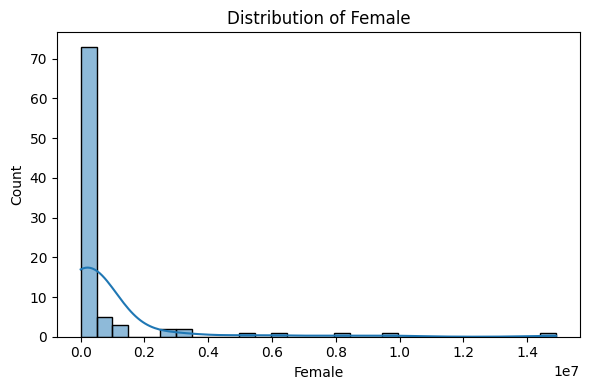

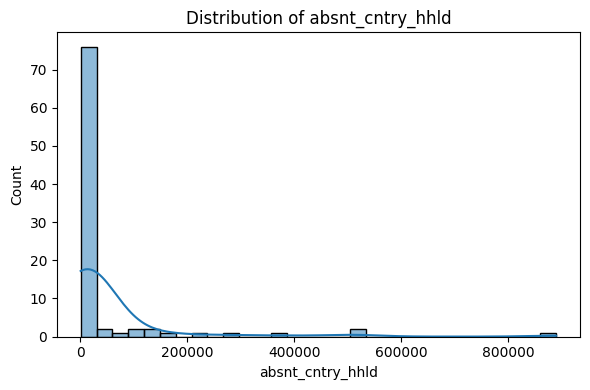

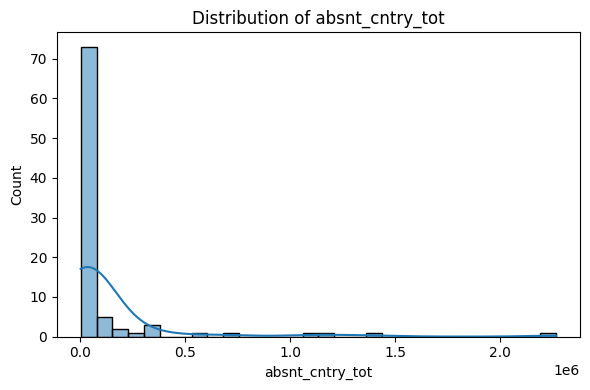

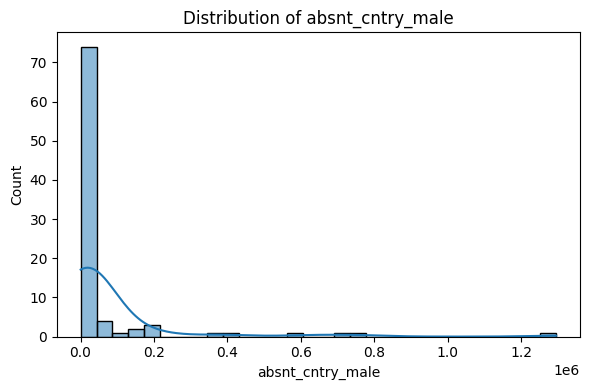

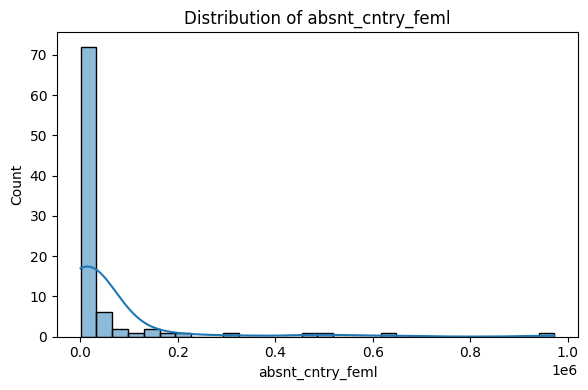

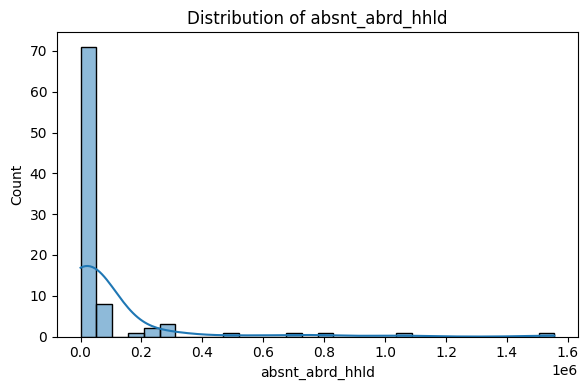

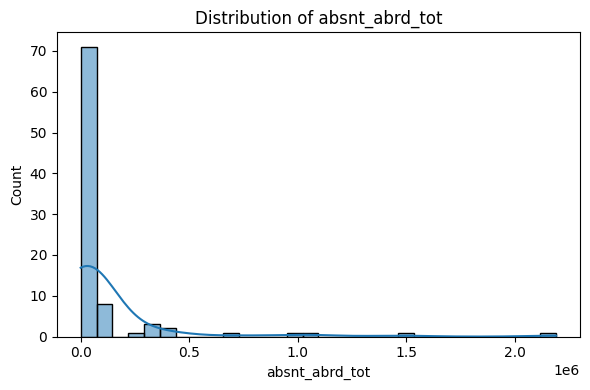

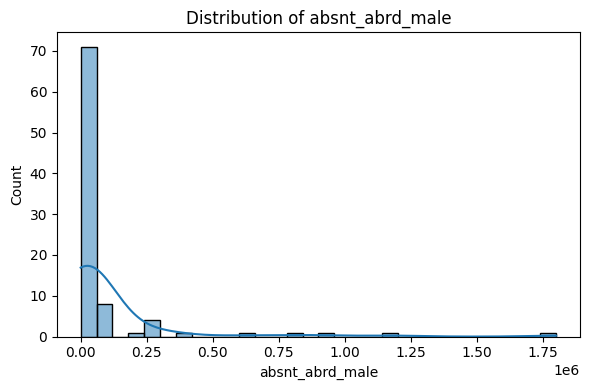

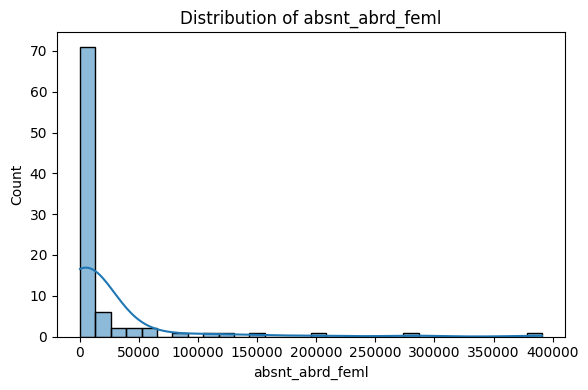

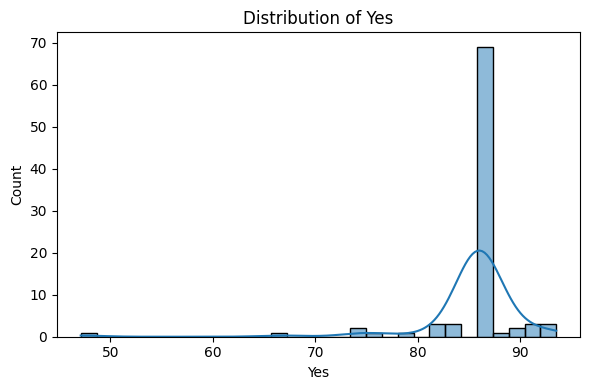

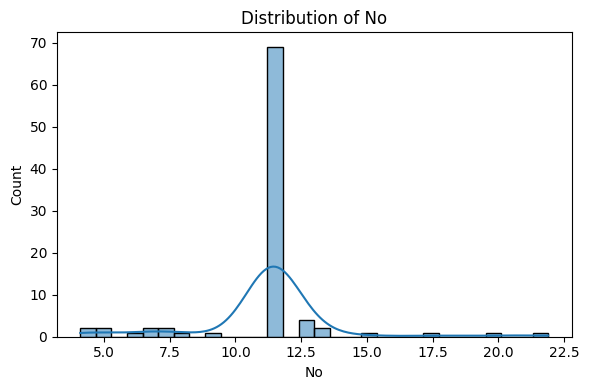

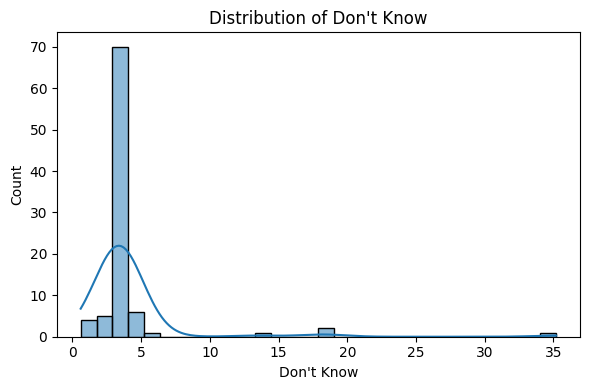

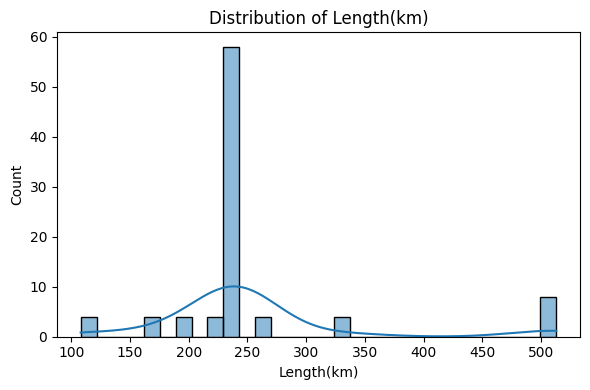

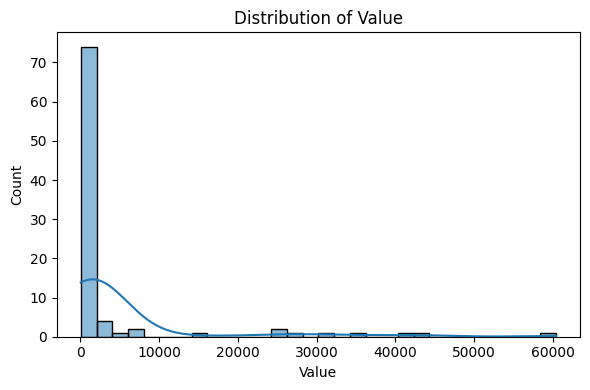

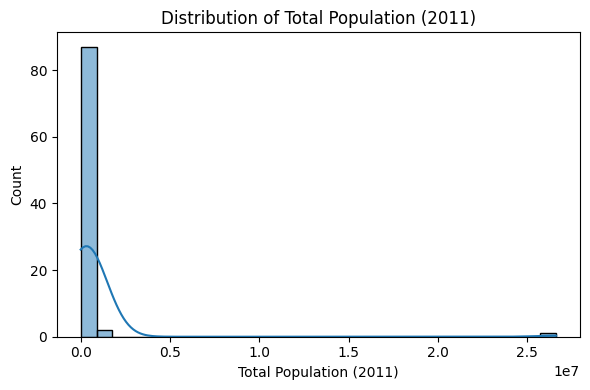

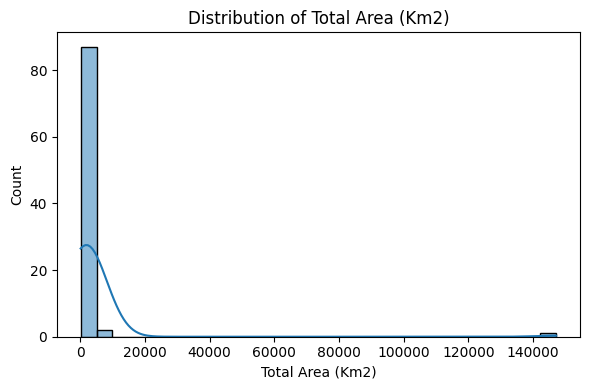

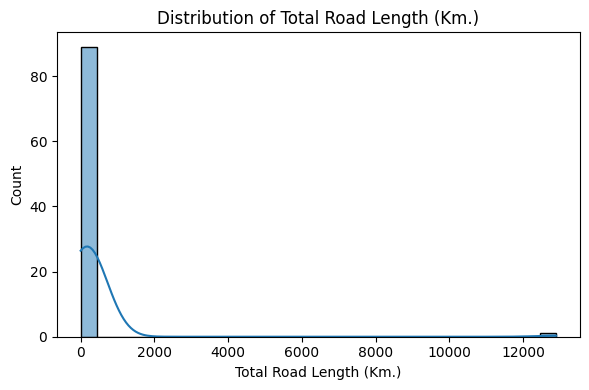

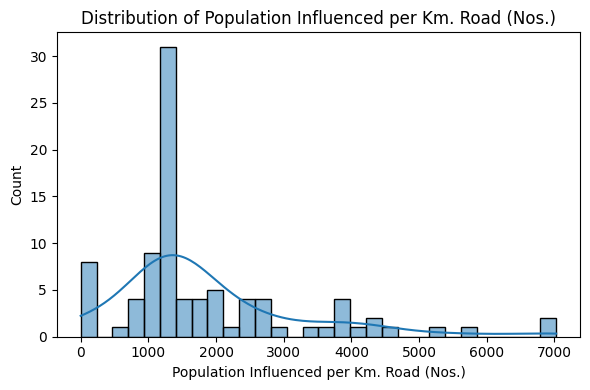

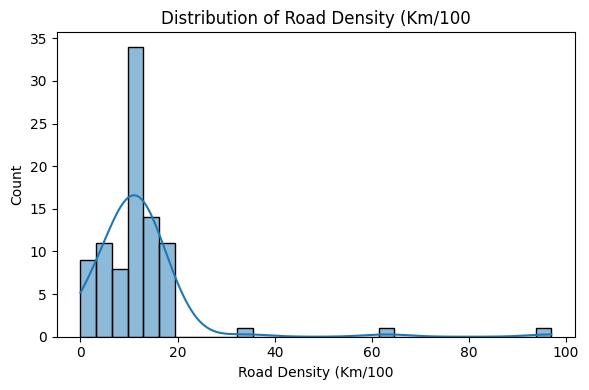

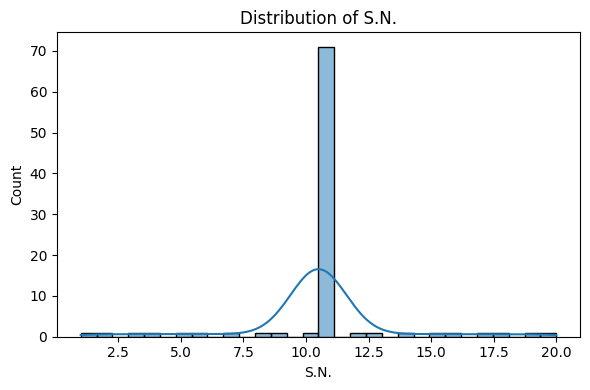

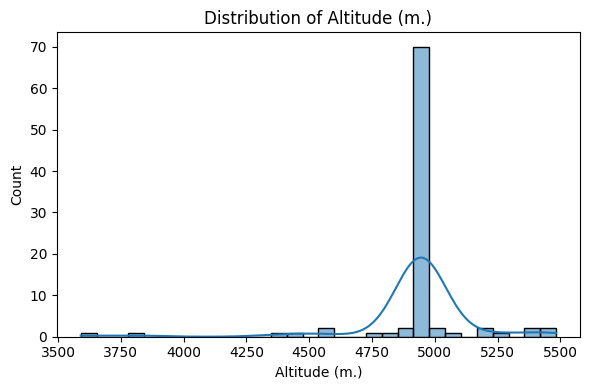

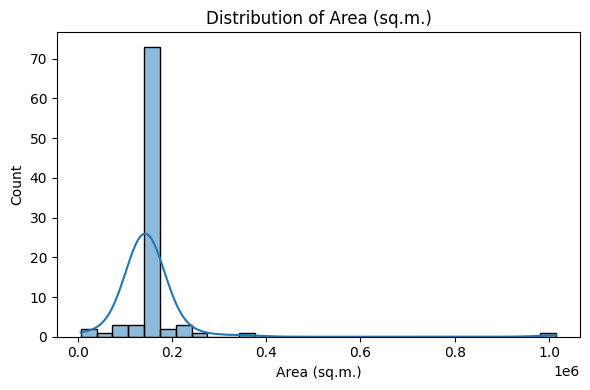

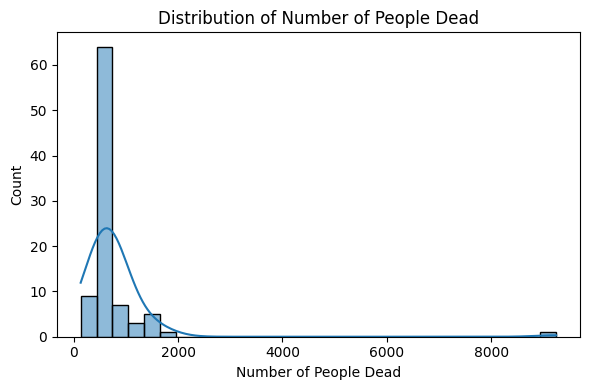

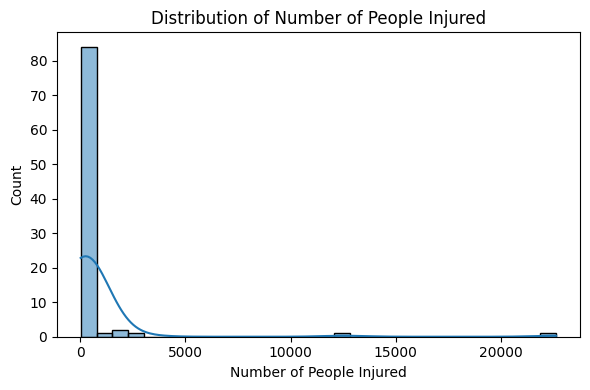

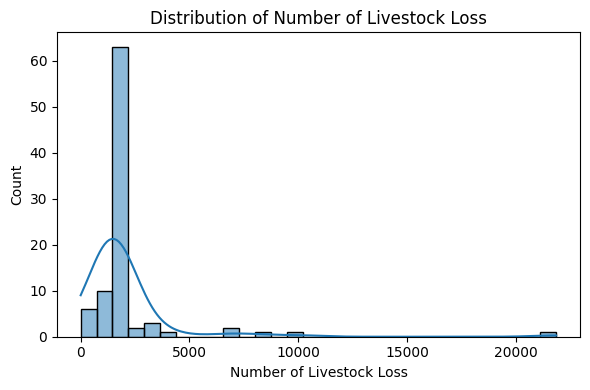

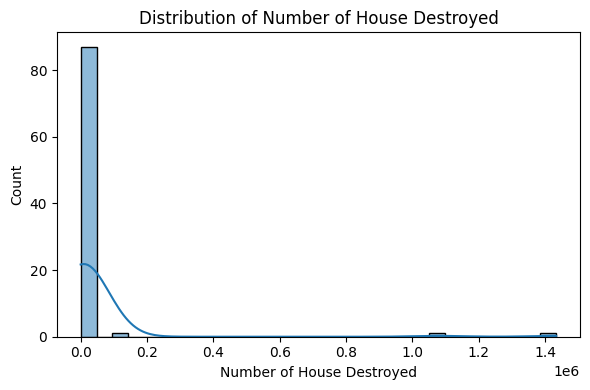

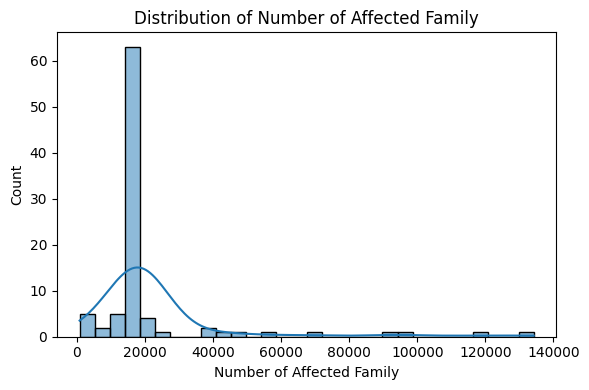

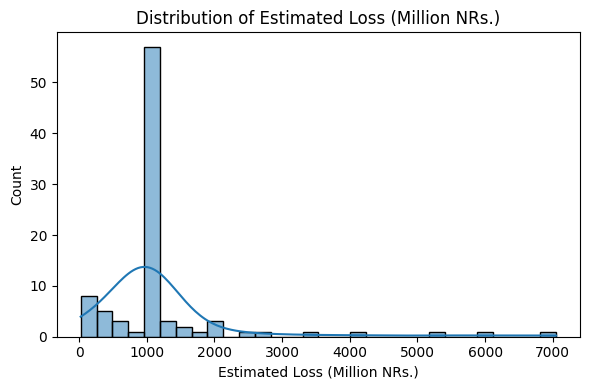

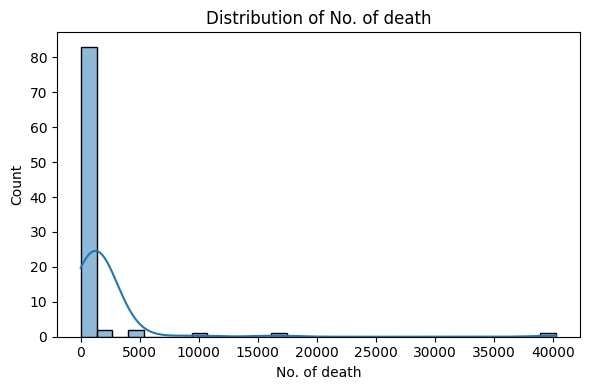

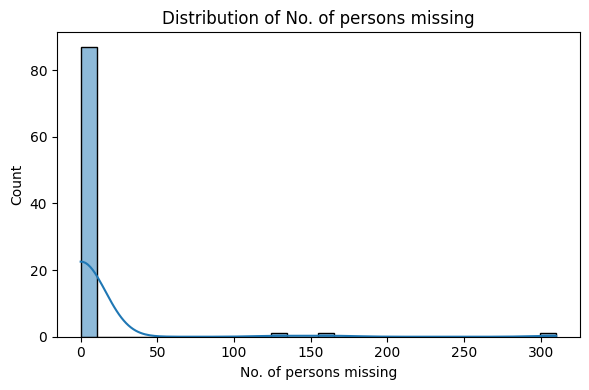

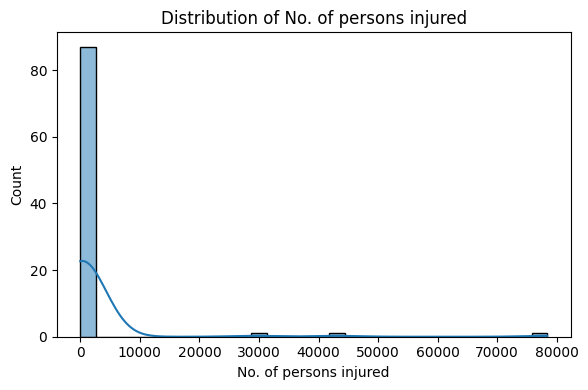

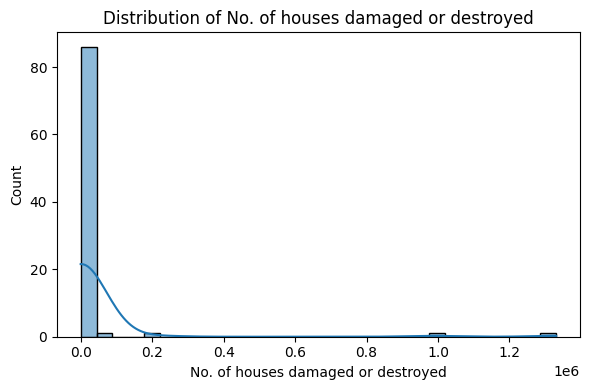

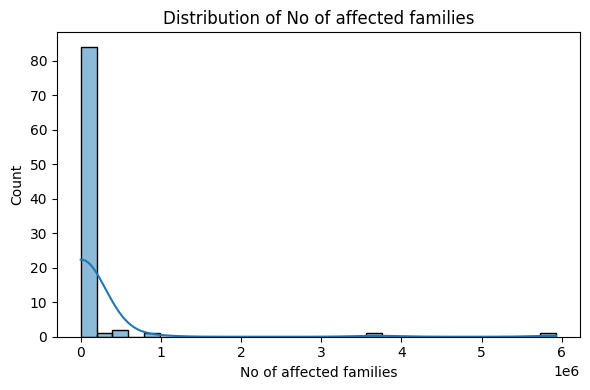

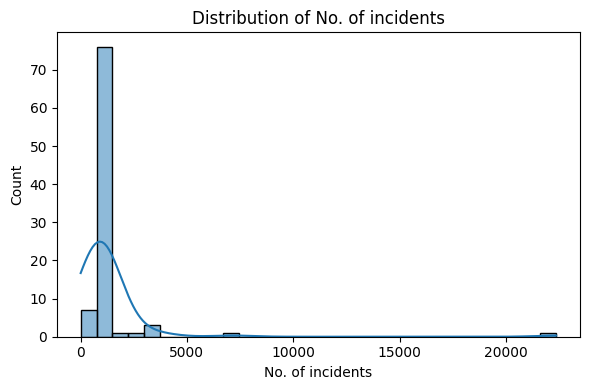

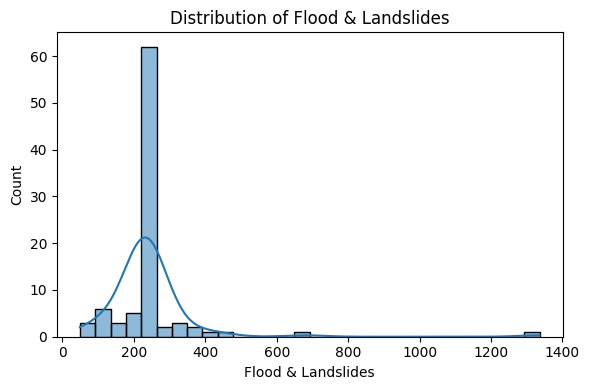

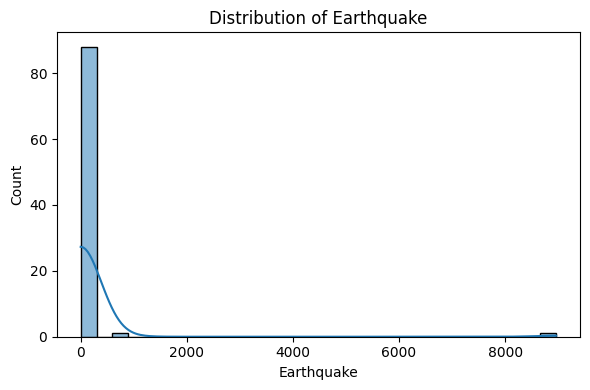

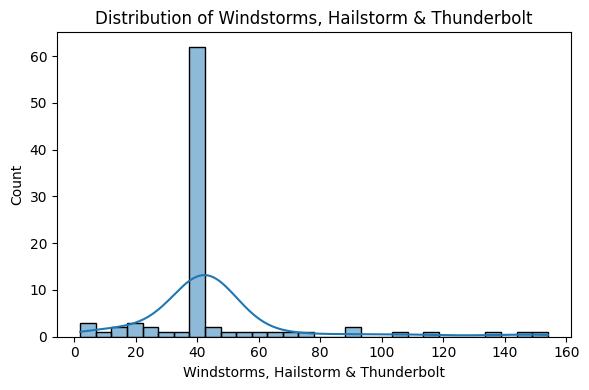

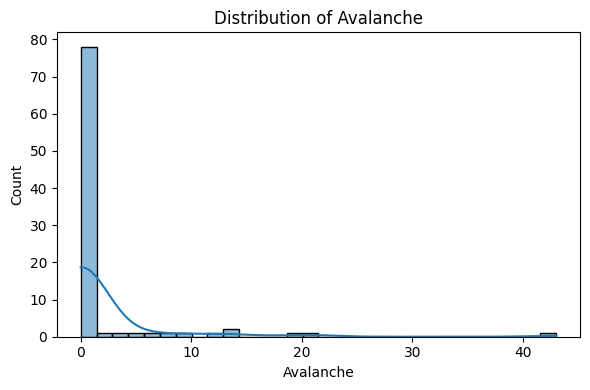

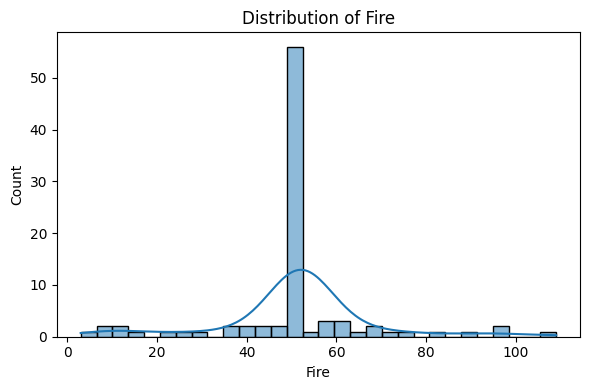

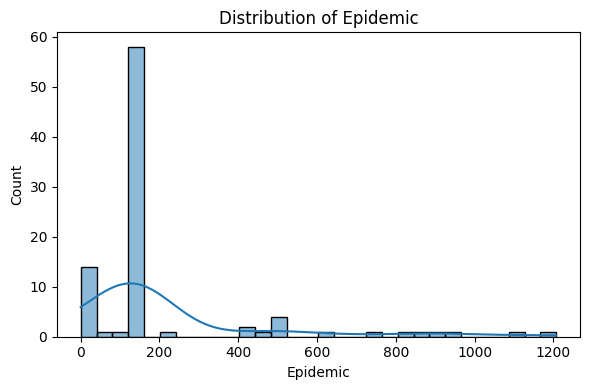

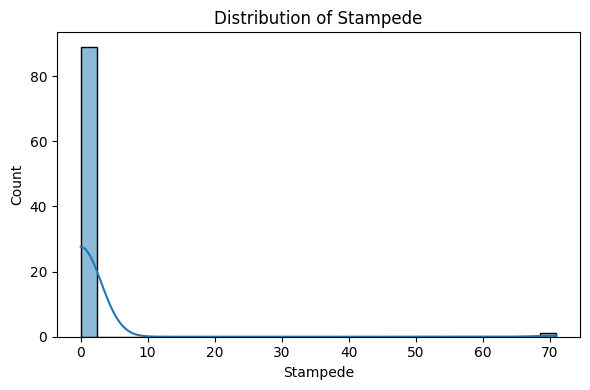

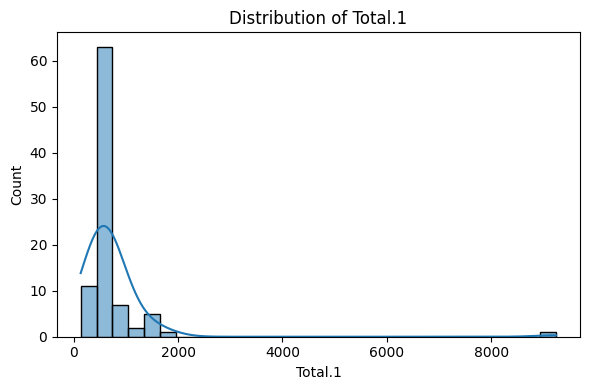

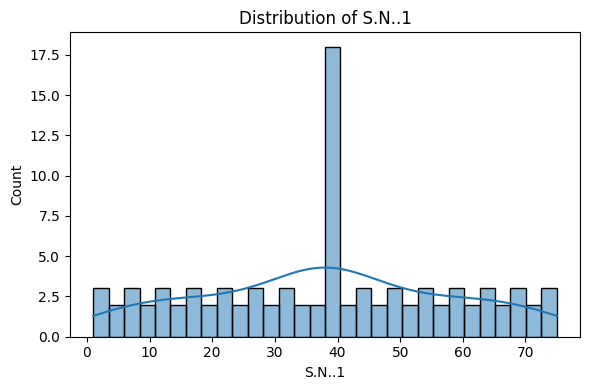

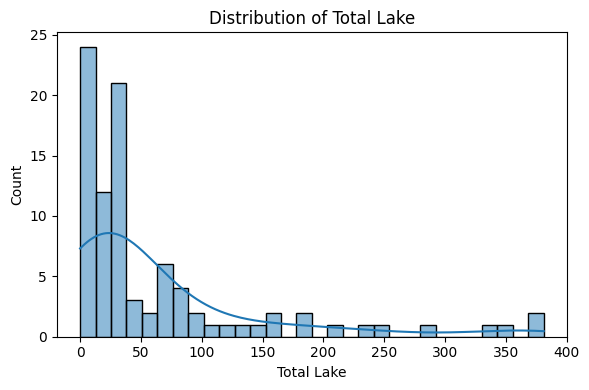

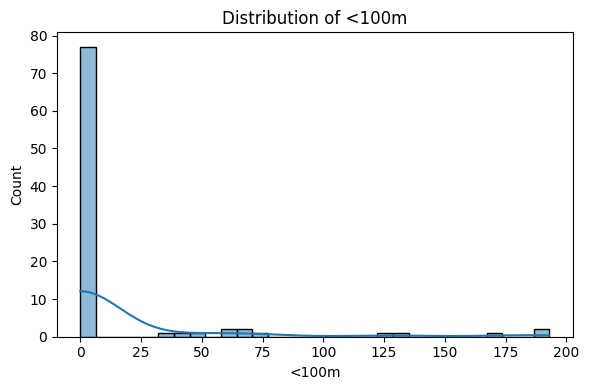

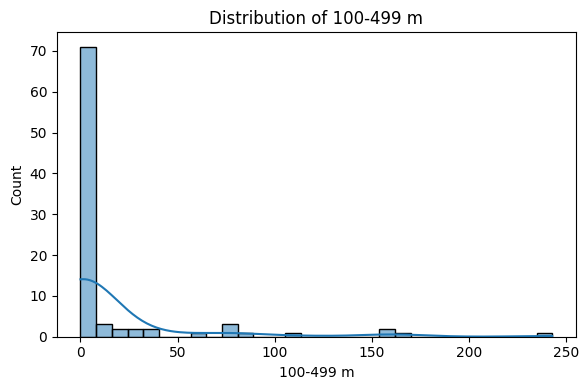

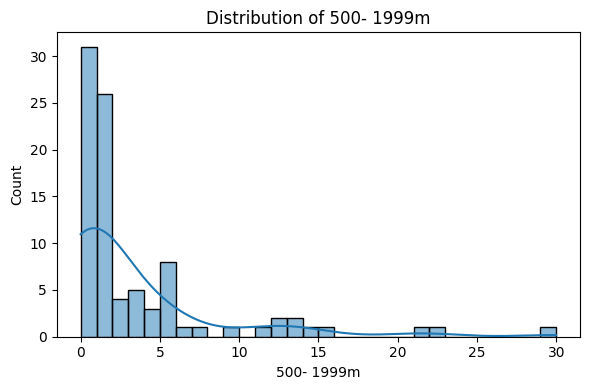

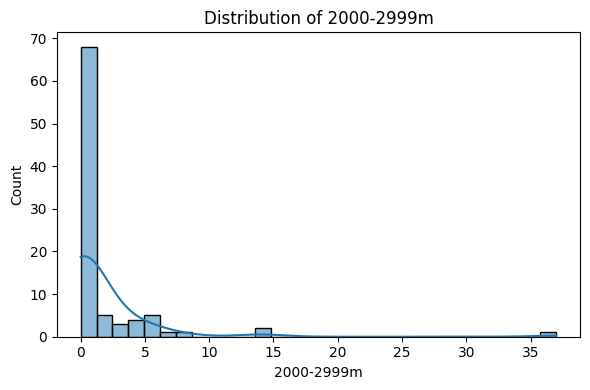

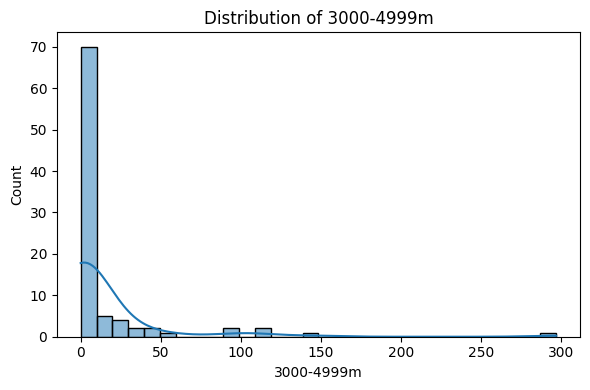

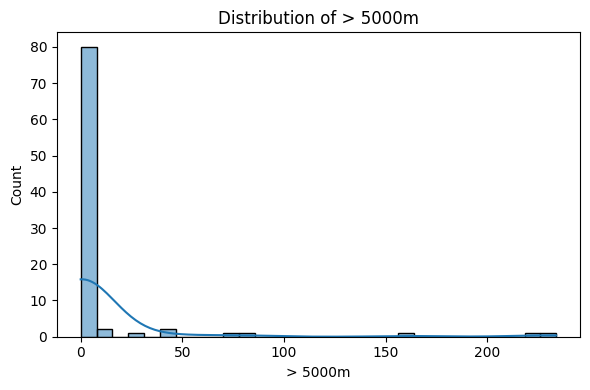

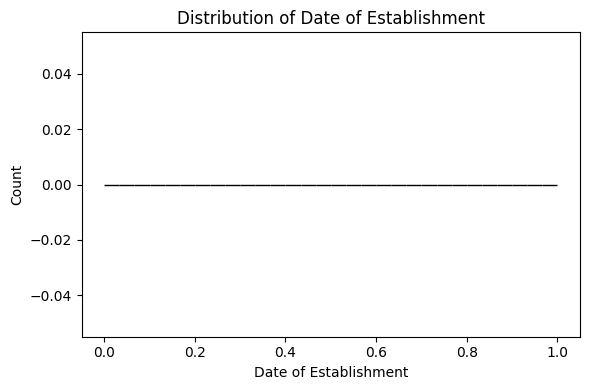

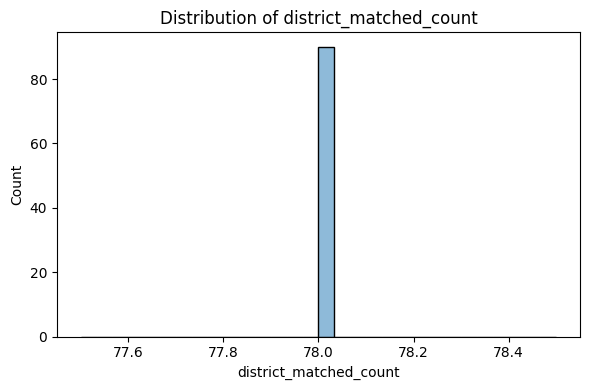

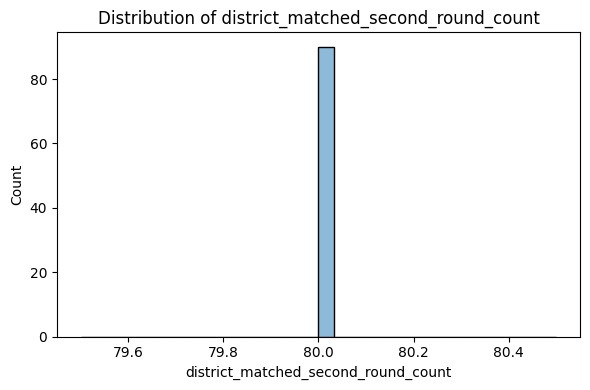

In [31]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


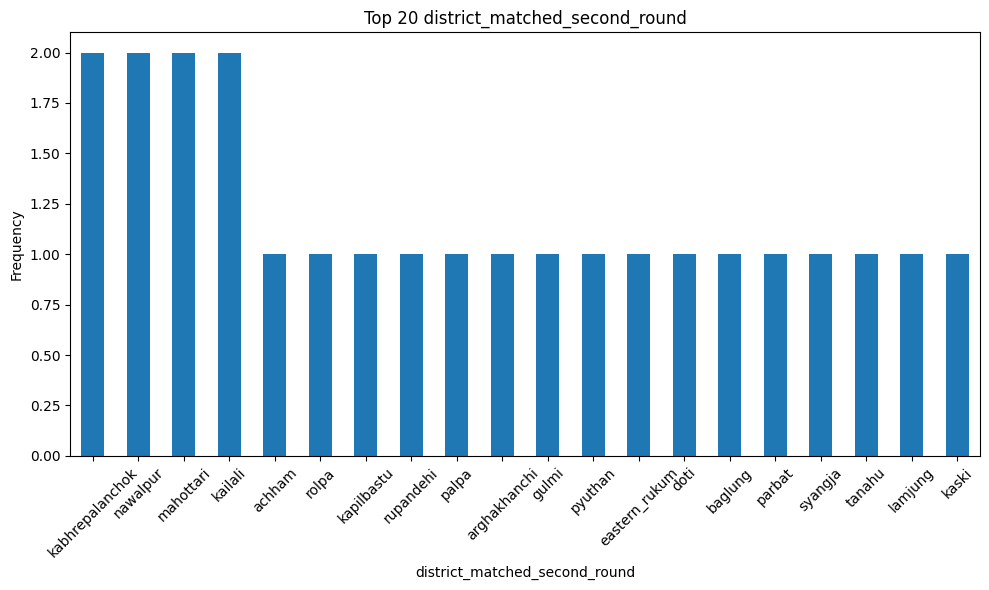

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in ["district_matched_second_round"]:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Top 20 {col}")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


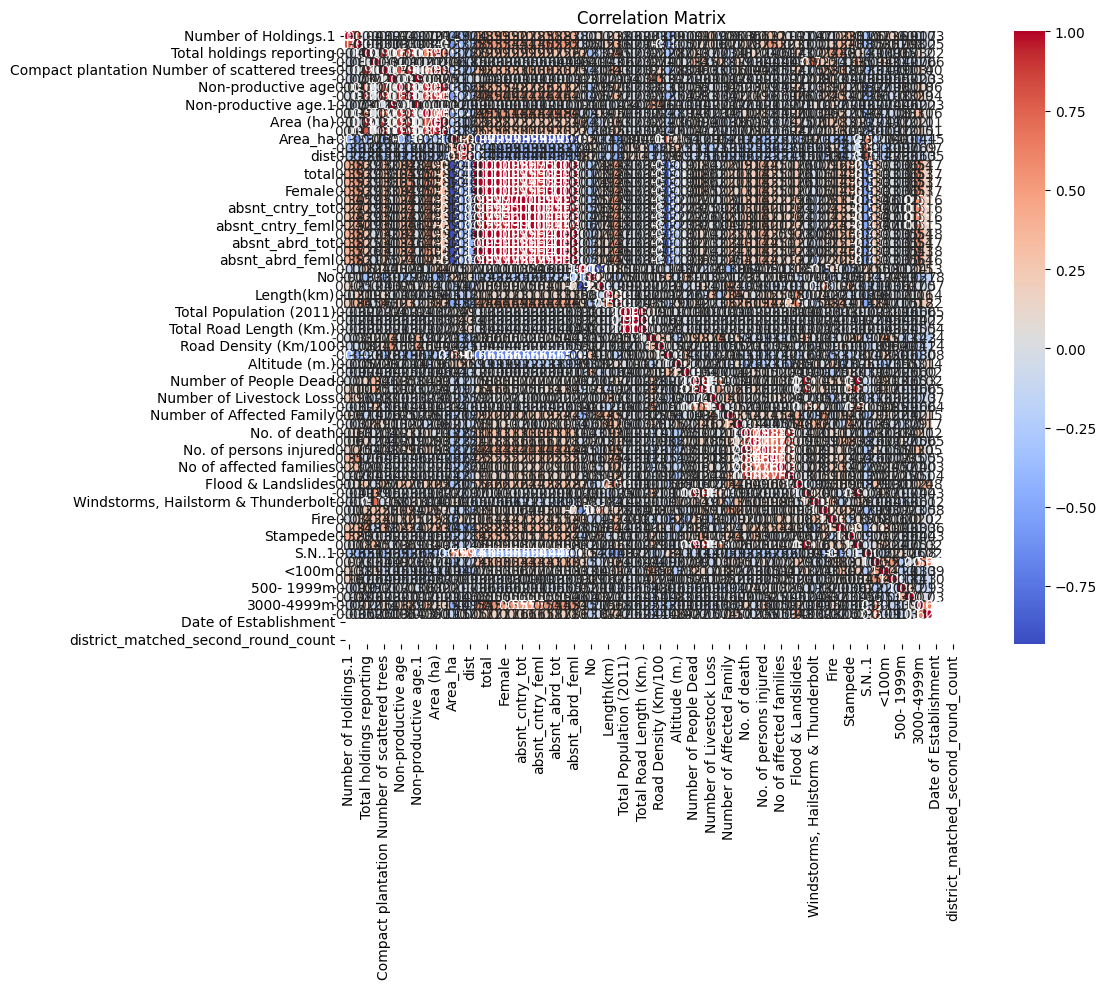

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


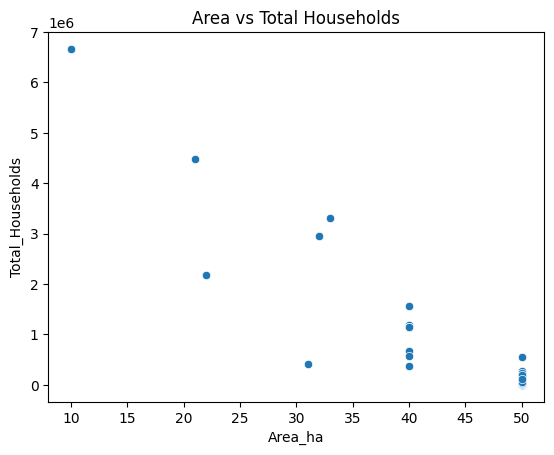

In [34]:
sns.scatterplot(data=df, x="Area_ha", y="Total_Households")
plt.title("Area vs Total Households")
plt.show()


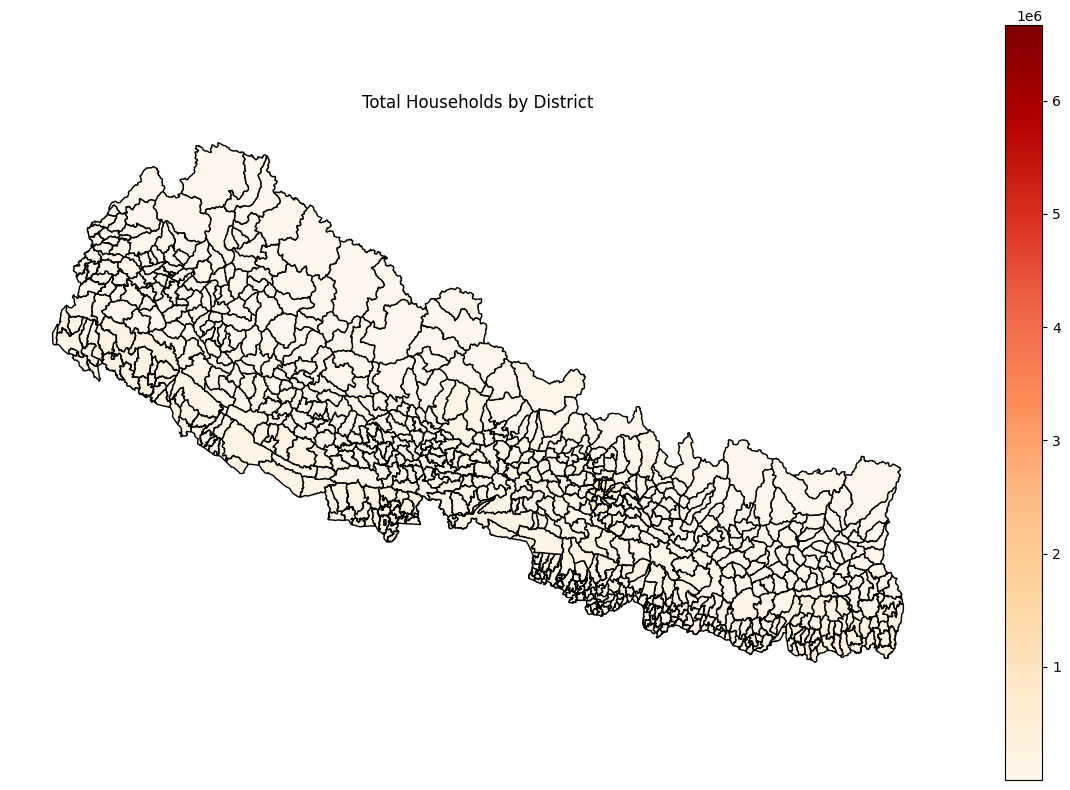

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your shapefile (GeoJSON)
gdf = gpd.read_file('../../data/processed/geo_socio_economic_profile.geojson')

# Load the cleaned socio-economic data CSV
data = pd.read_csv('../../data/processed/cleaned_soci_economic_profile.csv')

# Strip whitespace from column names
gdf.columns = gdf.columns.str.strip()
data.columns = data.columns.str.strip()


# Check for duplicates in district column before merging
if data['district'].duplicated().any():
    print("\nWarning: Duplicate districts found in CSV. Dropping duplicates...")
    data = data.drop_duplicates(subset='district')

# Merge GeoDataFrame with CSV data on 'district'
merged_df = gdf.merge(data, on='district', how='left')

# Convert to GeoDataFrame
geo_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Clean merged column names again in case of merge name mangling
geo_df.columns = geo_df.columns.str.strip()

# Check if 'Total_Households' or fallback column exists
target_column = 'Total_Households_y'
alternative_column = 'Number of Holdings.1'


# Plotting logic
if target_column in geo_df.columns:
    geo_df.plot(column=target_column, cmap="OrRd", legend=True, figsize=(12, 8), edgecolor='black')
    plt.title("Total Households by District")
elif alternative_column in geo_df.columns:
    geo_df.plot(column=alternative_column, cmap="OrRd", legend=True, figsize=(12, 8), edgecolor='black')
    plt.title(f"{alternative_column} by District")
else:
    pass
# Final formatting if plot was created
if target_column in geo_df.columns or alternative_column in geo_df.columns:
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [36]:
for col in df.select_dtypes(include='datetime').columns:
    print(f"Years in {col}:", df[col].dt.year.dropna().unique())


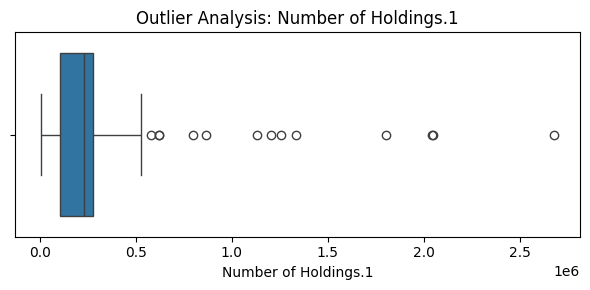

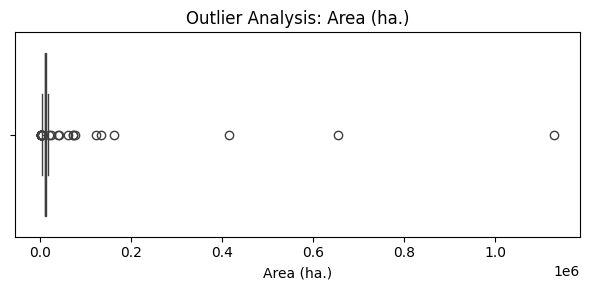

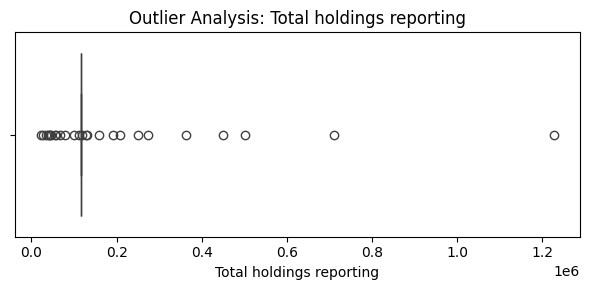

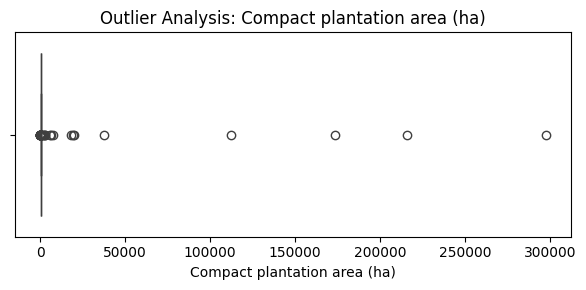

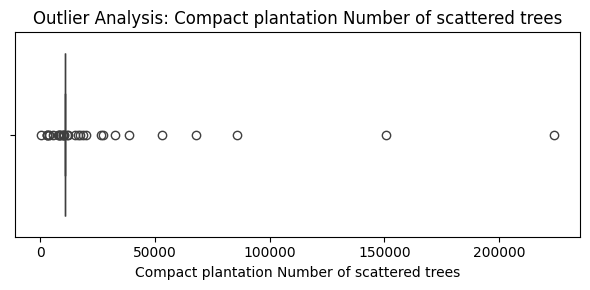

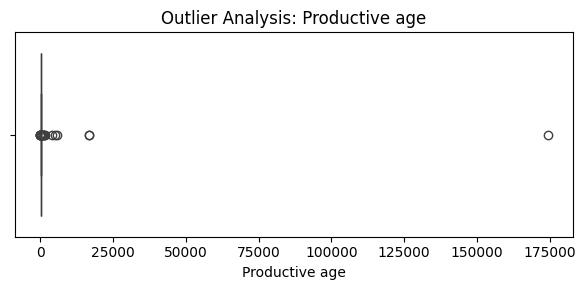

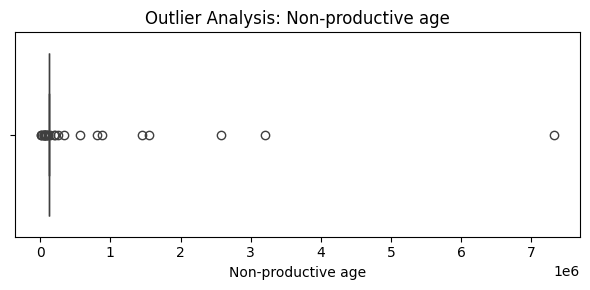

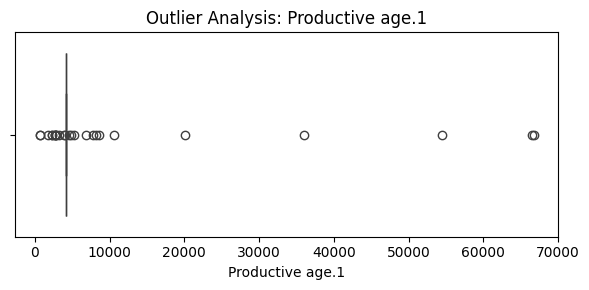

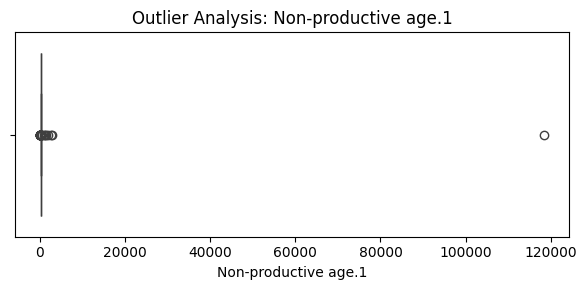

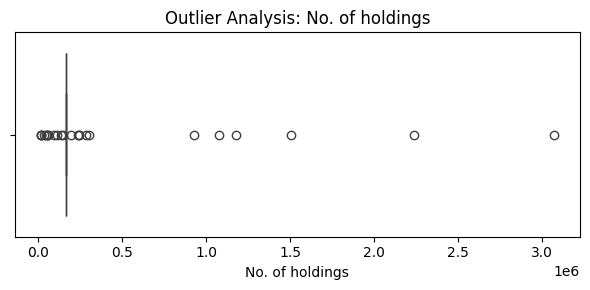

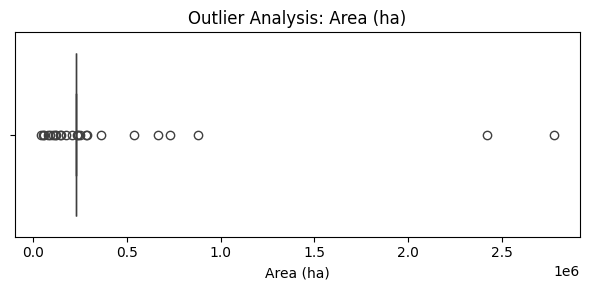

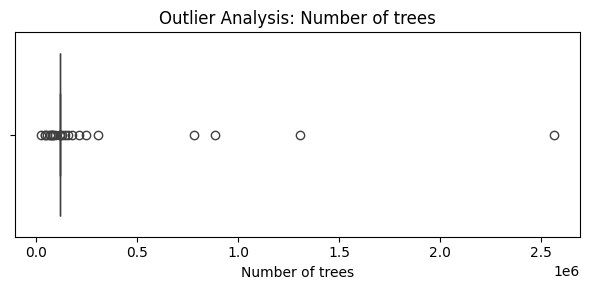

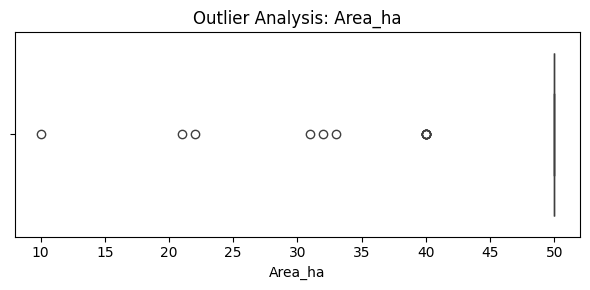

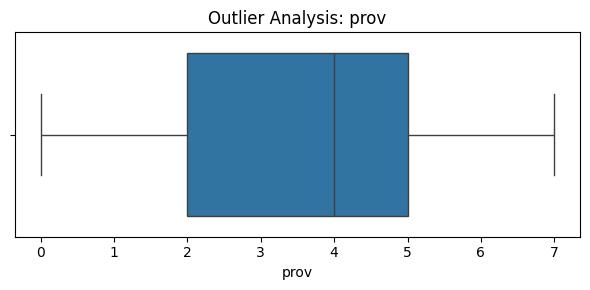

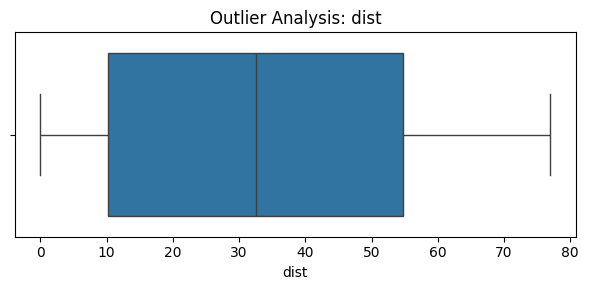

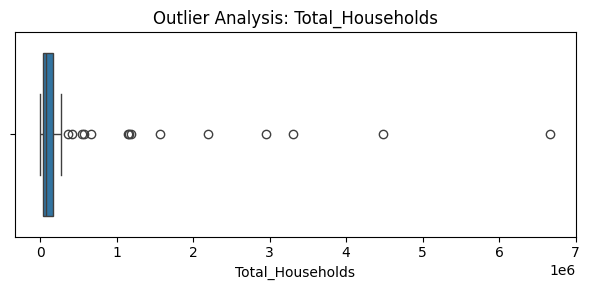

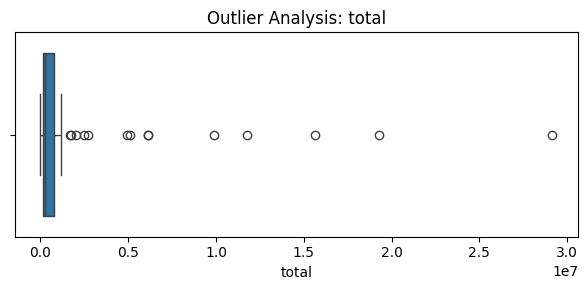

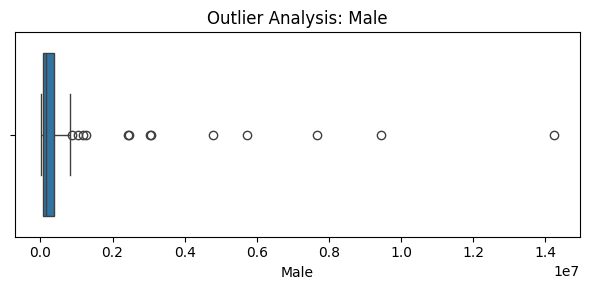

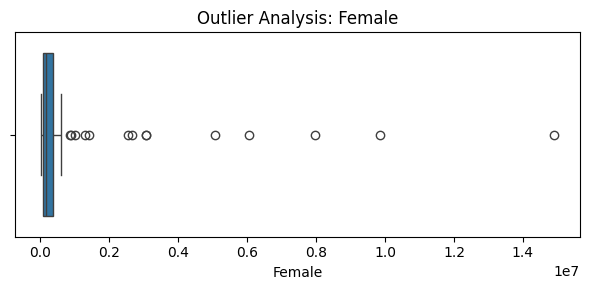

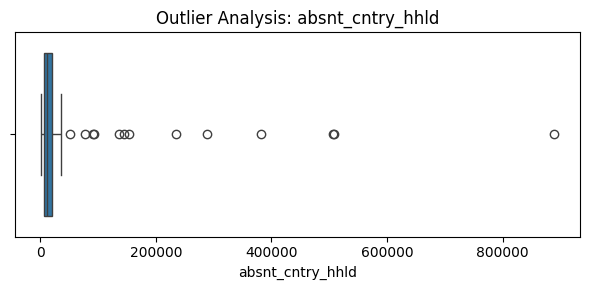

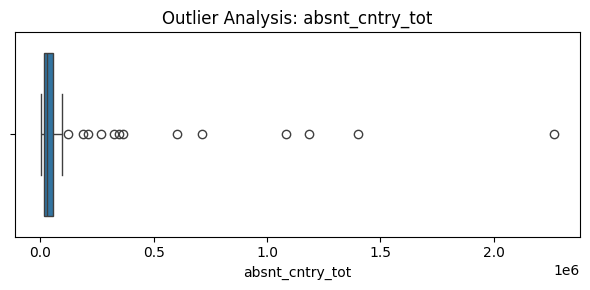

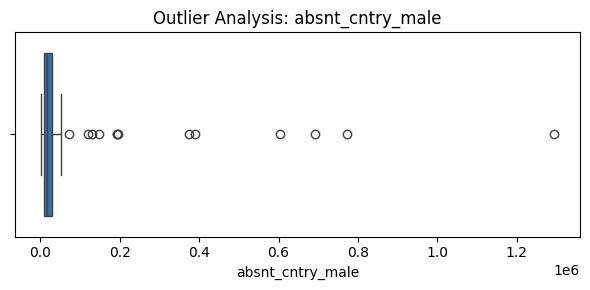

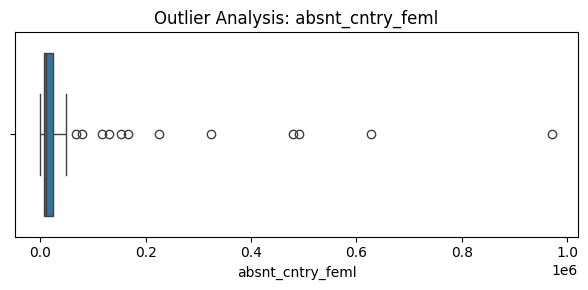

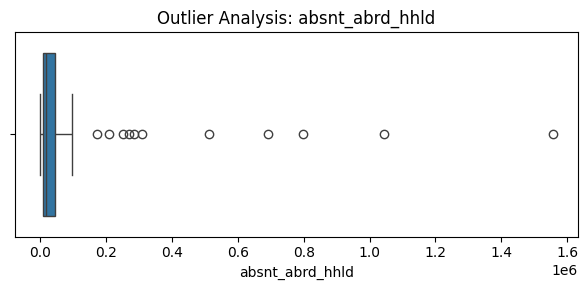

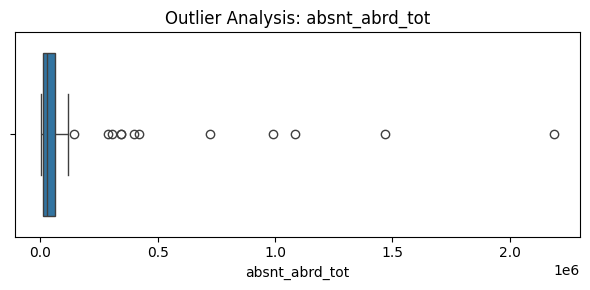

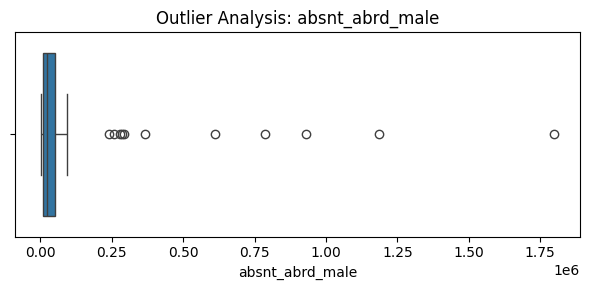

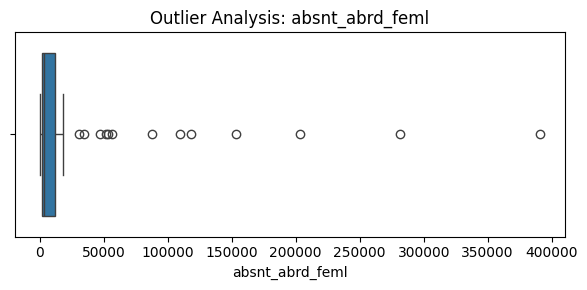

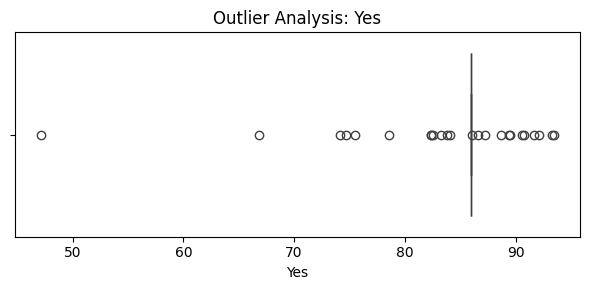

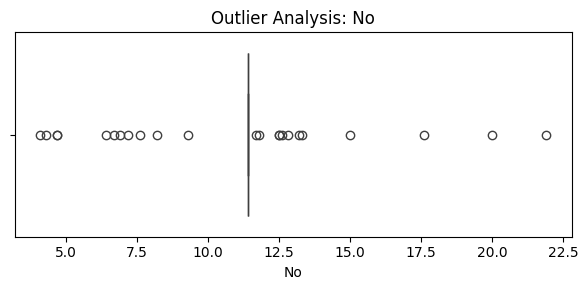

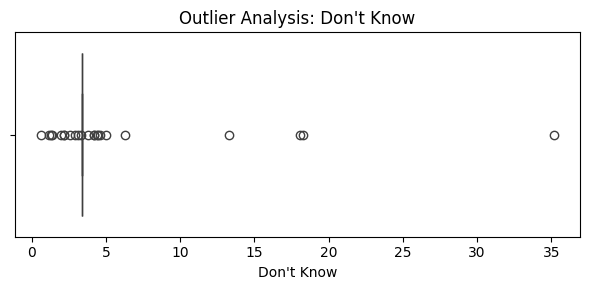

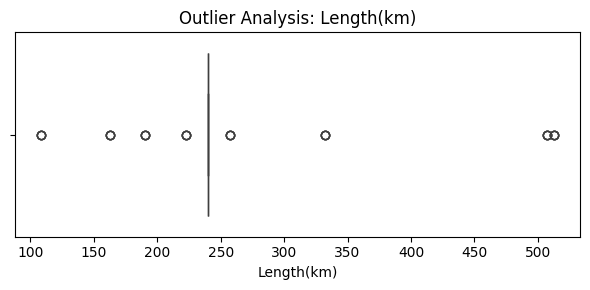

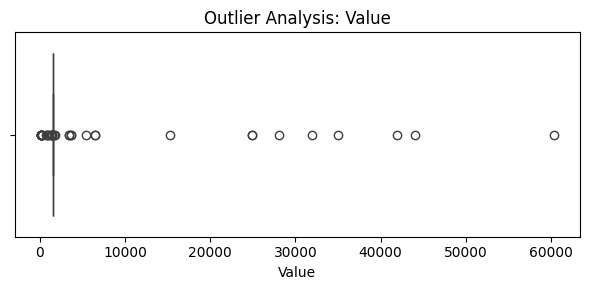

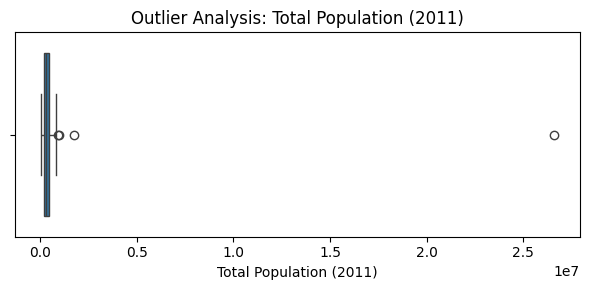

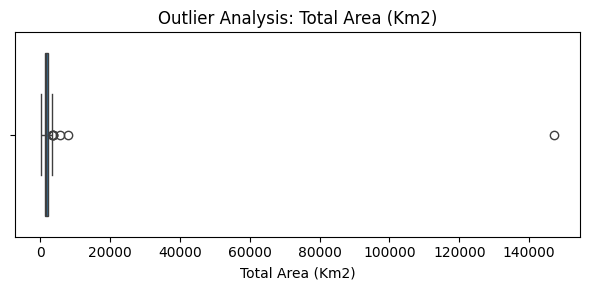

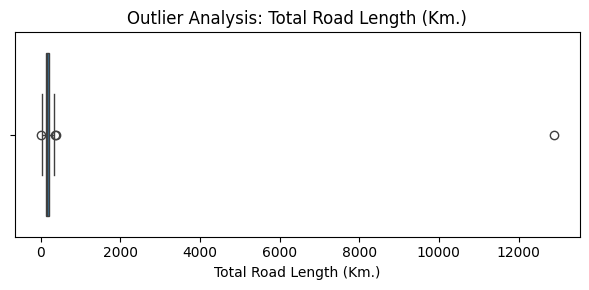

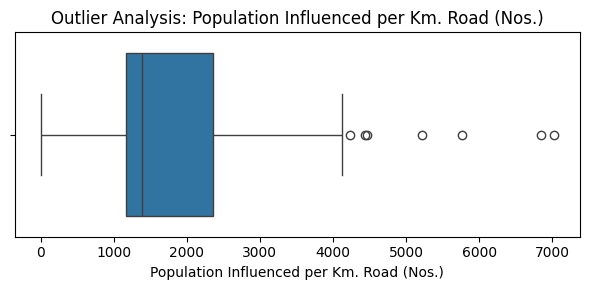

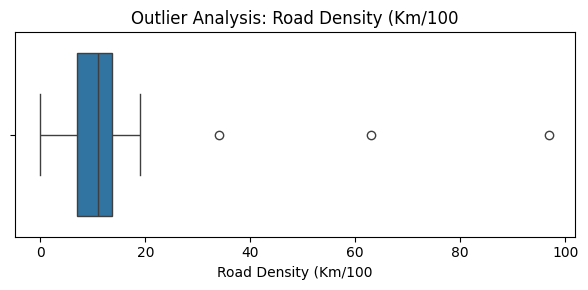

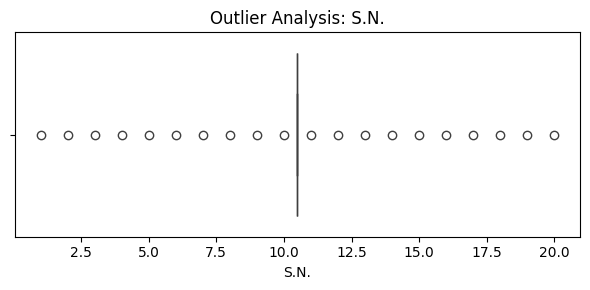

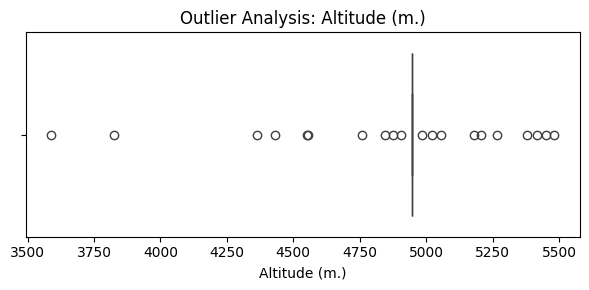

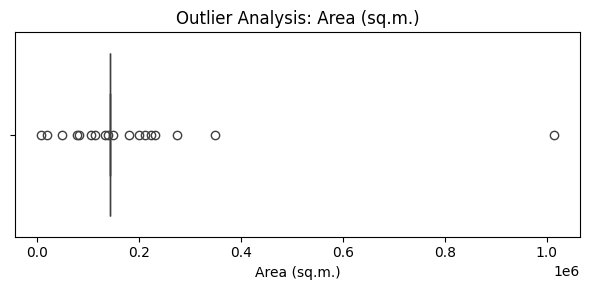

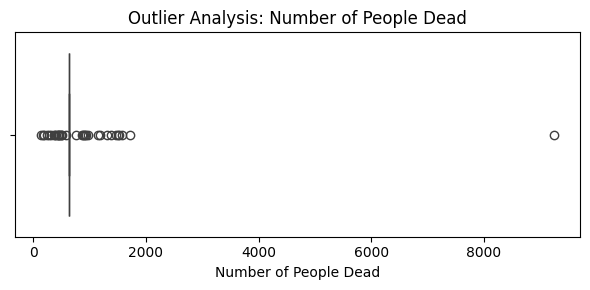

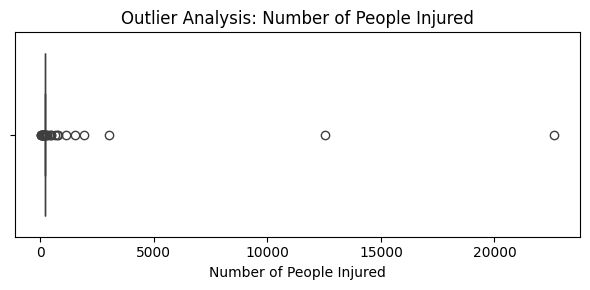

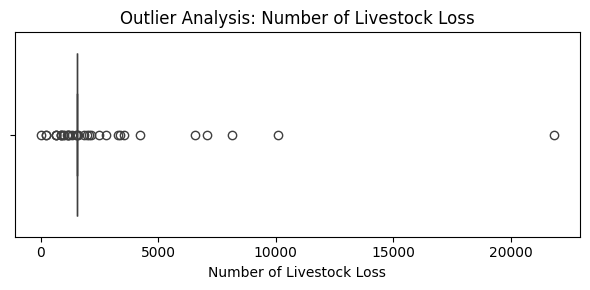

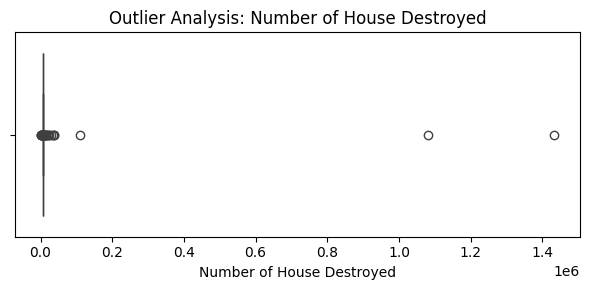

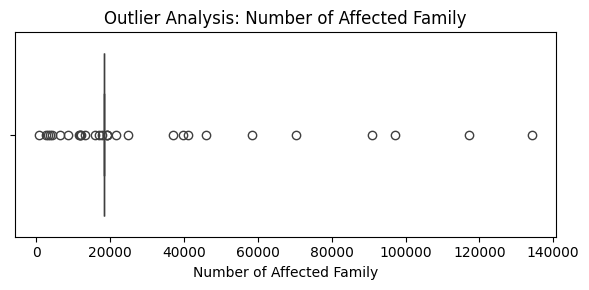

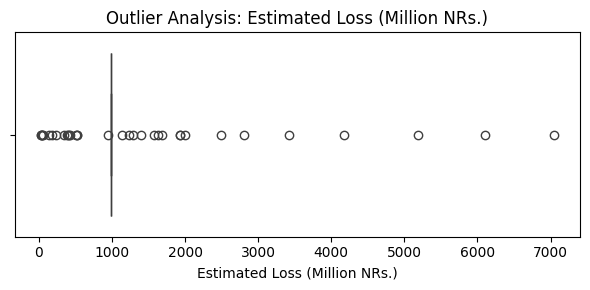

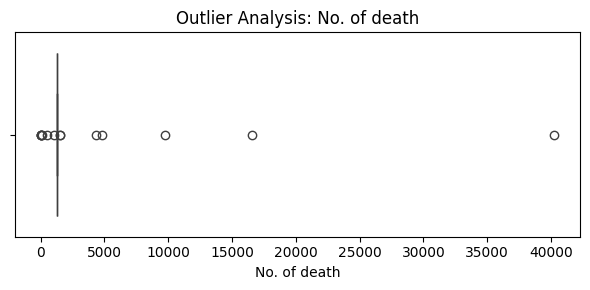

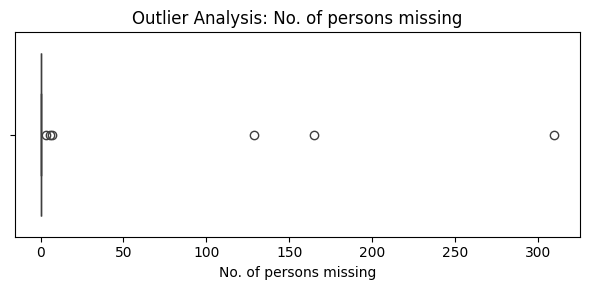

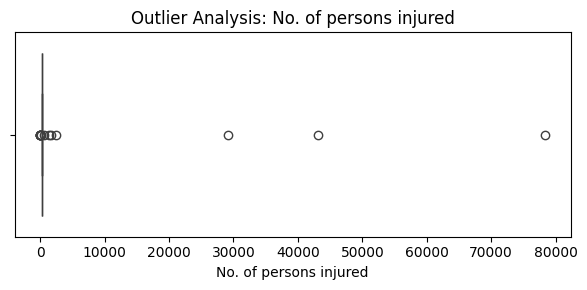

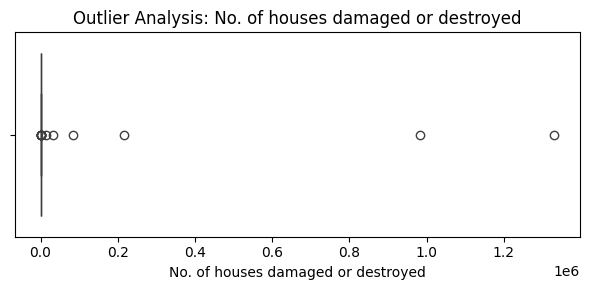

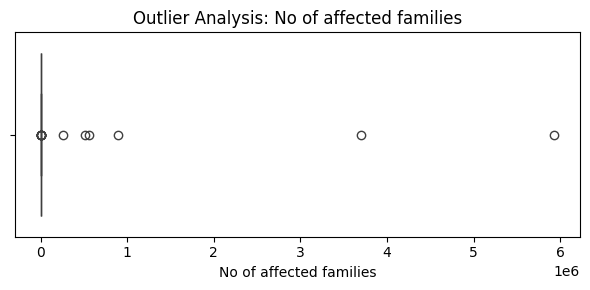

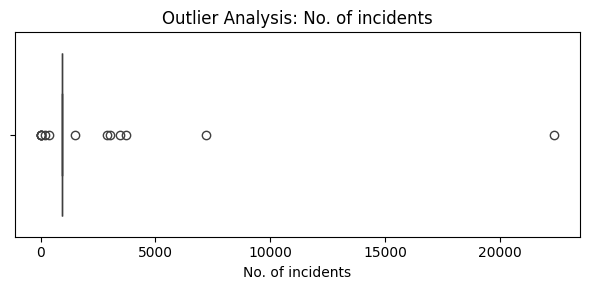

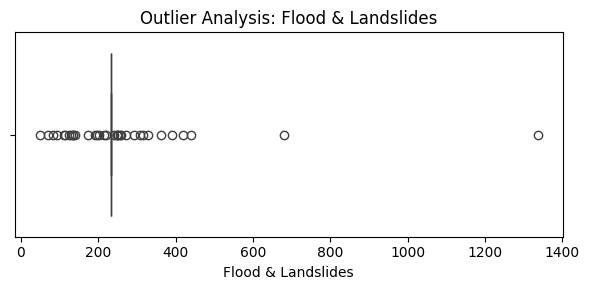

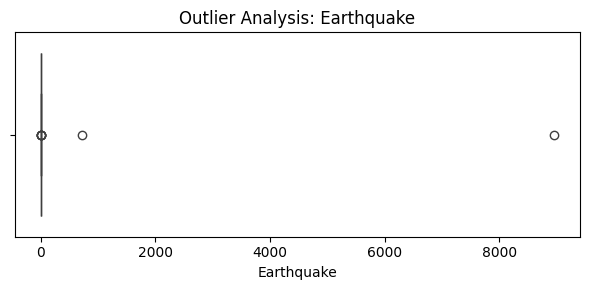

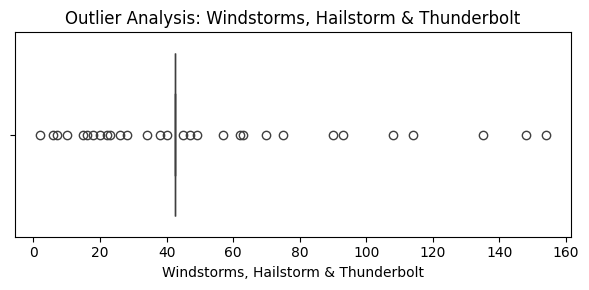

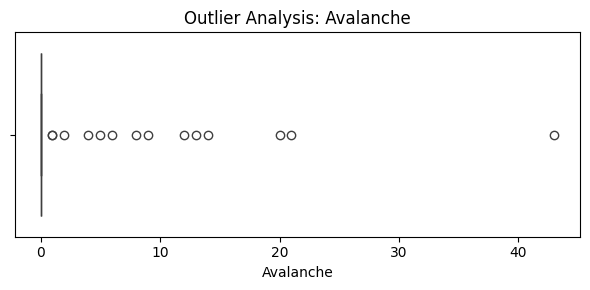

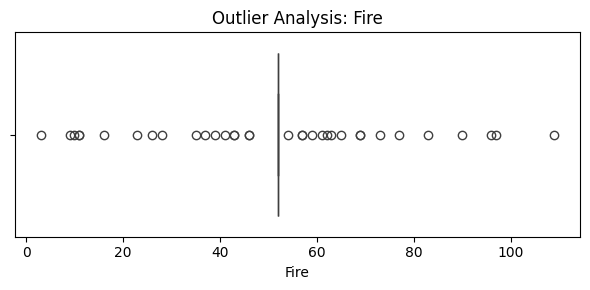

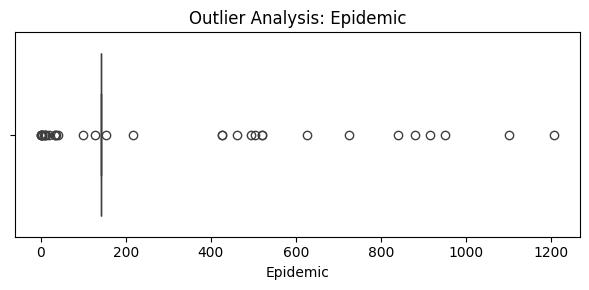

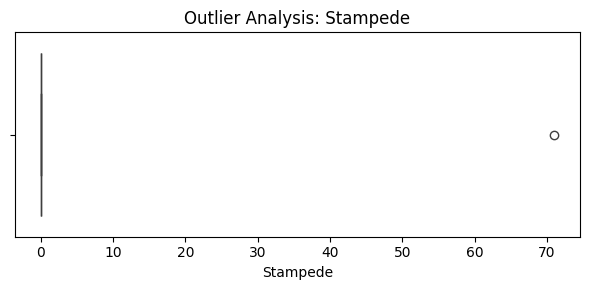

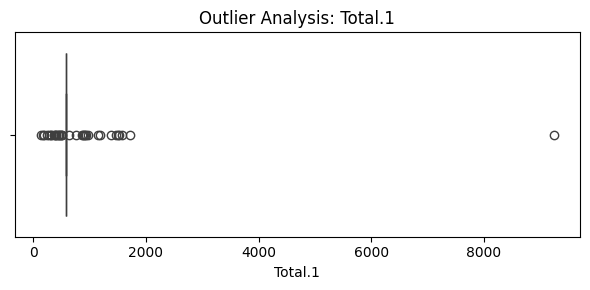

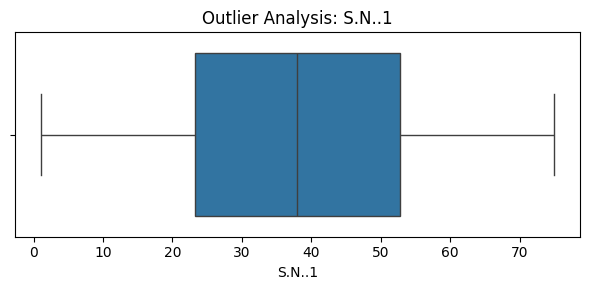

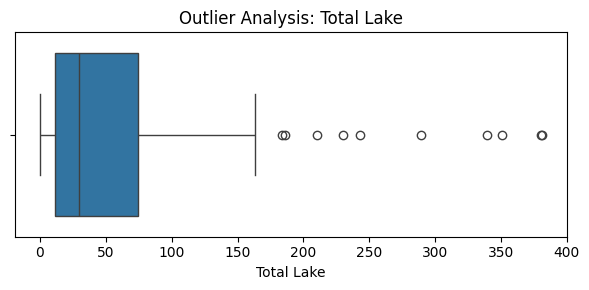

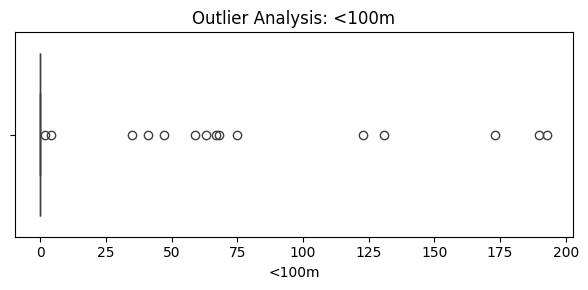

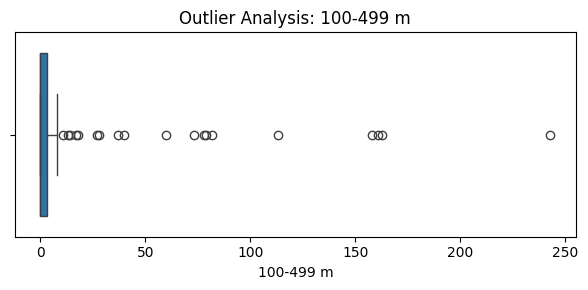

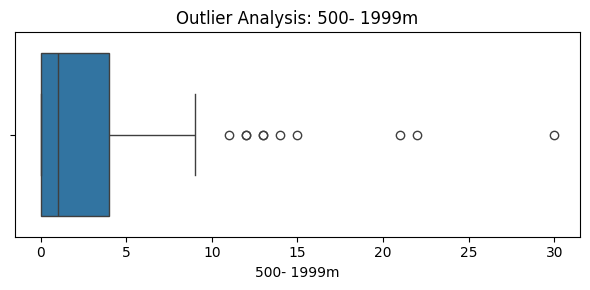

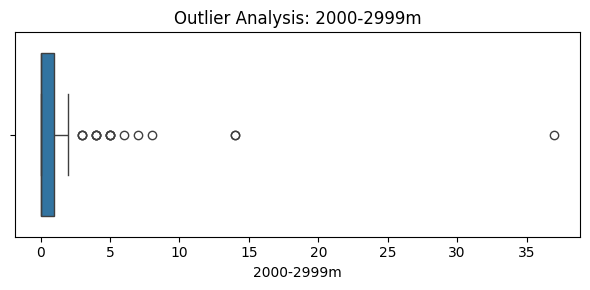

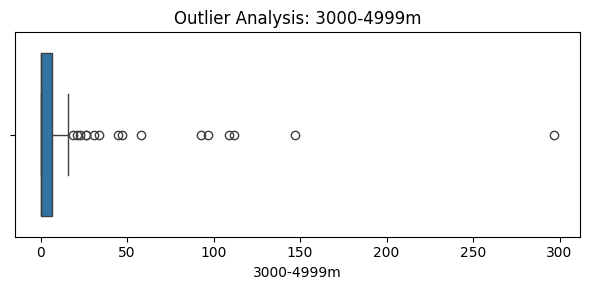

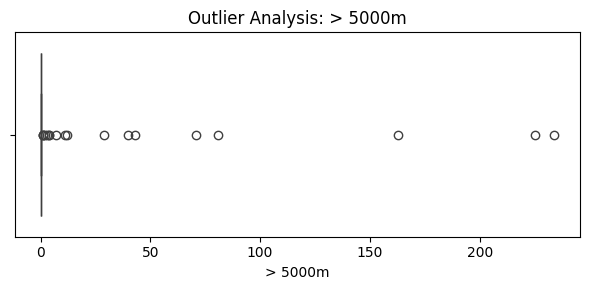

Skipping 'Date of Establishment' – all values are NaN or missing.


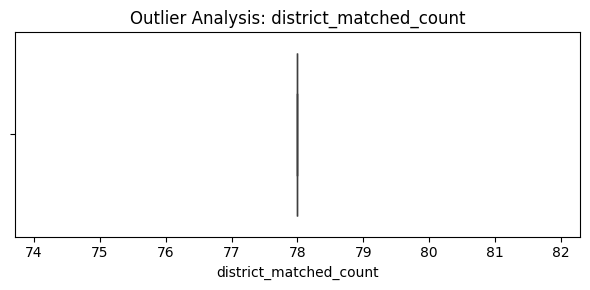

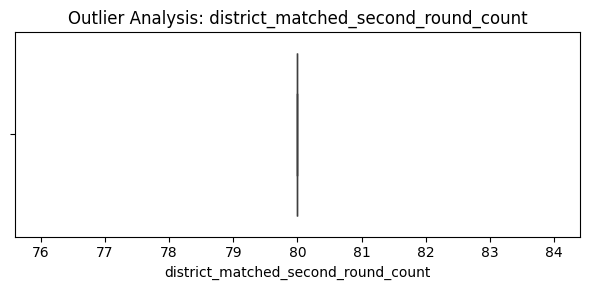

In [38]:
# for col in numeric_cols:
#     plt.figure(figsize=(6, 3))
#     sns.boxplot(x=df[col])
#     plt.title(f"Outlier Analysis: {col}")
#     plt.tight_layout()
#     plt.show()

import numpy as np

for col in numeric_cols:
    # Drop NaNs and check if data is valid
    series = df[col].dropna()

    if series.empty:
        print(f"Skipping '{col}' – all values are NaN or missing.")
        continue
    if not np.issubdtype(series.dtype, np.number):
        print(f"Skipping '{col}' – not numeric.")
        continue
    if not np.isfinite(series).any():
        print(f"Skipping '{col}' – all values are infinite.")
        continue

    plt.figure(figsize=(6, 3))
    sns.boxplot(x=series)
    plt.title(f"Outlier Analysis: {col}")
    plt.tight_layout()
    plt.show()
